<a href="https://colab.research.google.com/github/Mmkdstaz/kaggle/blob/main/mlg/mlg_creditfraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Знакомства с данными

In [1]:
pip install kagglehub[pandas-datasets]

In [2]:
# Install dependencies as needed:

import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
# The original error was due to an empty file_path.
# Assuming the dataset contains 'creditcard.csv' as a common filename for this dataset.
file_path = "creditcard.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "mlg-ulb/creditcardfraud",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-2267620233.py:12: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'creditcardfraud' dataset.
First 5 records:    Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ...

In [3]:
!pip install umap-learn

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import umap
from sklearn.manifold import TSNE
import time
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, precision_recall_curve, auc, average_precision_score, matthews_corrcoef, f1_score, precision_score, recall_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import IsolationForest, RandomForestClassifier, StackingClassifier
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import regularizers
from xgboost import XGBClassifier
import torch
import torch.nn as nn
import torch.optim as optim
import xgboost as xgb

In [5]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


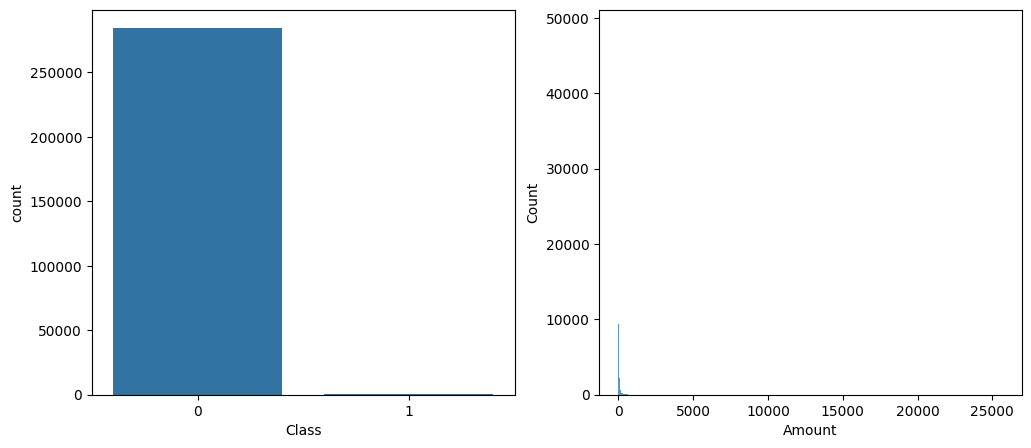

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax.ravel()
sns.countplot(x='Class', data=df, ax=ax[0])
sns.histplot(x='Amount', data=df, ax=ax[1])
plt.show()

#EDA

##Анализ дисбаланса по классу

In [8]:
counts = df['Class'].value_counts()
fraud_count = counts[1]
normal_count = counts[0]
fraud_percent = (fraud_count / (fraud_count + normal_count)) * 100
print(f"Normal транзакций: {normal_count}")
print(f"Fraud транзакций: {fraud_count}")
print(f"Процент мошенничества: {fraud_percent:.3f}%")

Normal транзакций: 284315
Fraud транзакций: 492
Процент мошенничества: 0.173%


/tmp/ipython-input-368057687.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, ax=ax[0], palette='viridis')


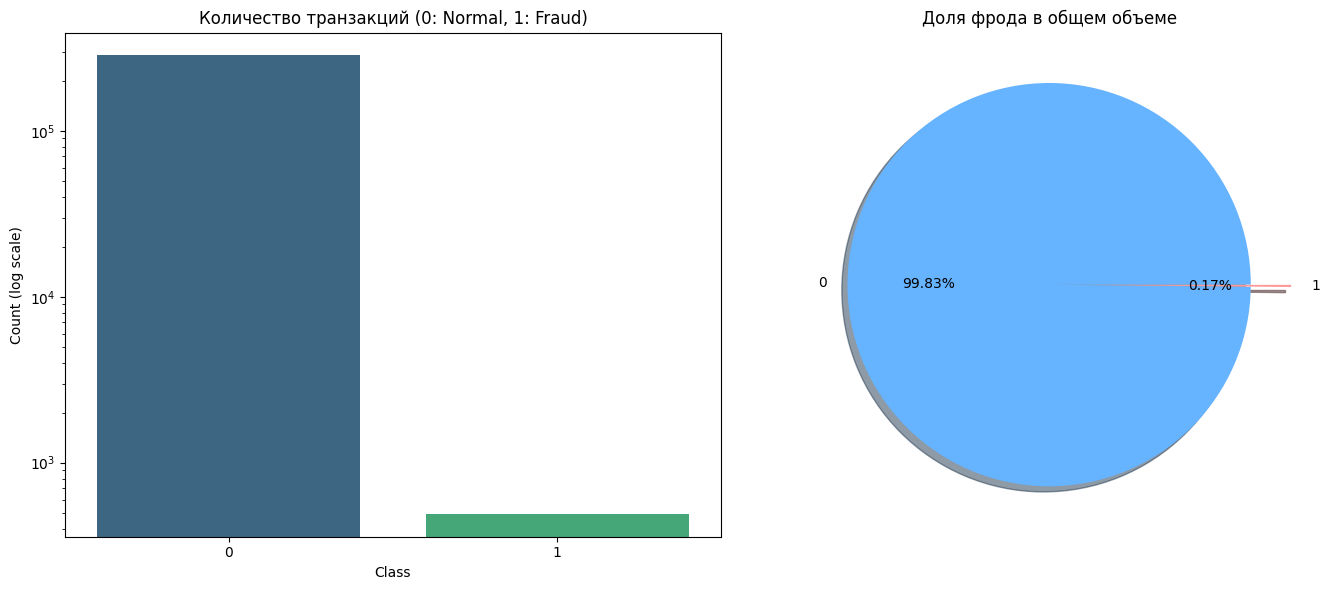

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(x='Class', data=df, ax=ax[0], palette='viridis')
ax[0].set_title('Количество транзакций (0: Normal, 1: Fraud)')
ax[0].set_yscale('log')
ax[0].set_ylabel('Count (log scale)')

df['Class'].value_counts().plot.pie(
    explode=[0, 0.2],
    autopct='%1.2f%%',
    ax=ax[1],
    shadow=True,
    colors=['#66b3ff','#ff9999']
)
ax[1].set_title('Доля фрода в общем объеме')
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()

##Анализ по времени

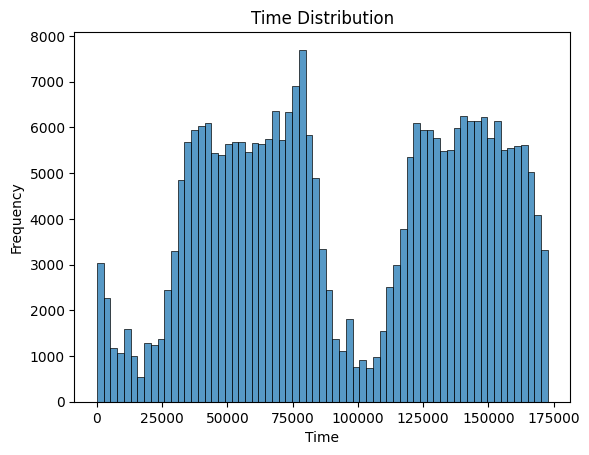

In [10]:
sns.histplot(x='Time', data=df,)
plt.title('Time Distribution')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

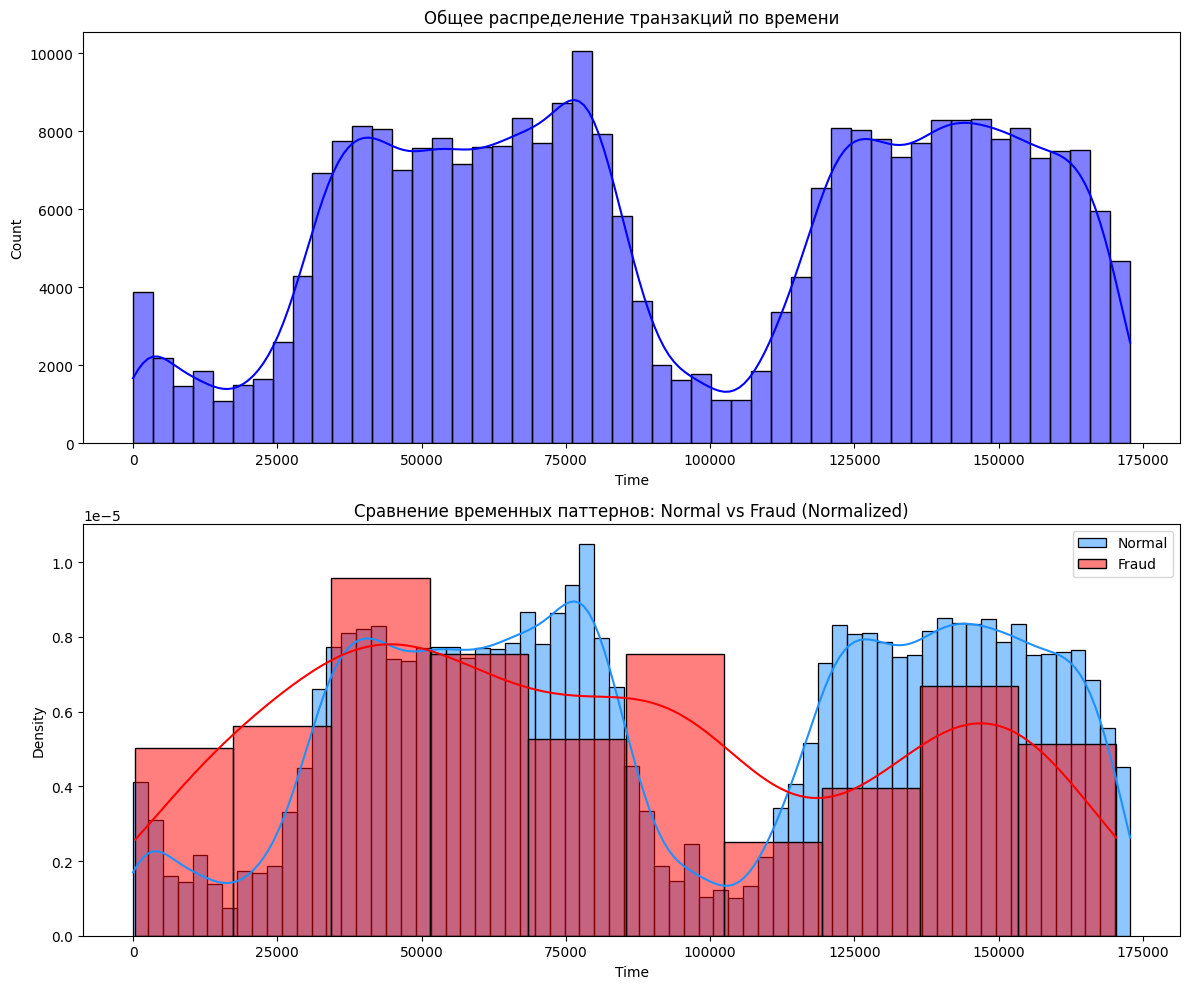

In [11]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

sns.histplot(df['Time'], bins=50, kde=True, ax=ax1, color='blue')
ax1.set_title('Общее распределение транзакций по времени')

sns.histplot(df[df['Class'] == 0]['Time'], color='dodgerblue', label='Normal',
             kde=True, stat="density", common_norm=False, ax=ax2)
sns.histplot(df[df['Class'] == 1]['Time'], color='red', label='Fraud',
             kde=True, stat="density", common_norm=False, ax=ax2)

ax2.set_title('Сравнение временных паттернов: Normal vs Fraud (Normalized)')
ax2.legend()

plt.tight_layout()
plt.show()

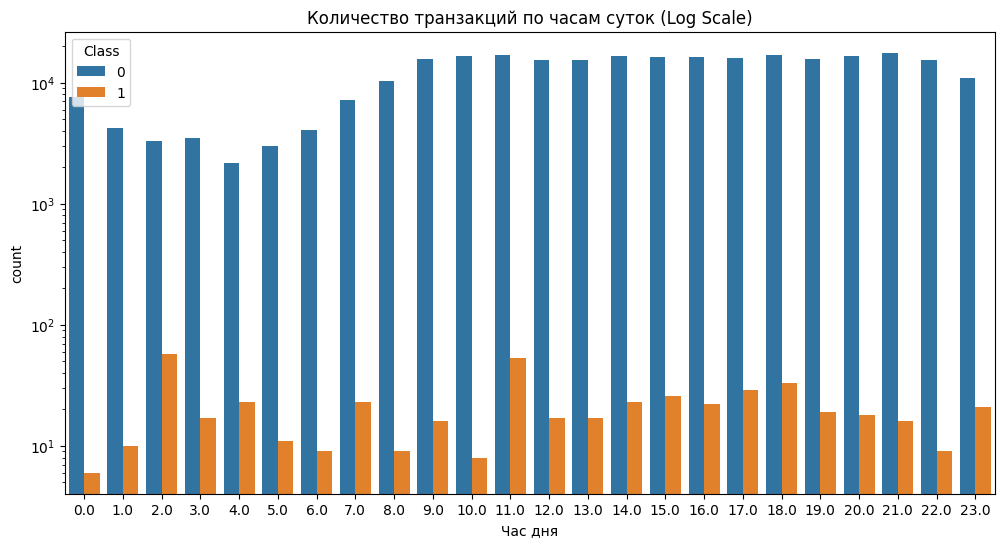

In [12]:
df['Hour'] = (df['Time'] // 3600) % 24

plt.figure(figsize=(12, 6))
sns.countplot(x='Hour', hue='Class', data=df)
plt.yscale('log')
plt.title('Количество транзакций по часам суток (Log Scale)')
plt.xlabel('Час дня')
plt.show()

In [13]:
def time_bin(hour):
    if 0 <= hour < 6: return 'Night'
    elif 6 <= hour < 12: return 'Morning'
    elif 12 <= hour < 18: return 'Afternoon'
    else: return 'Evening'

df['Time_DayPart'] = df['Hour'].apply(time_bin)

fraud_ratio = df.groupby('Time_DayPart')['Class'].mean().sort_values(ascending=False)
print("Вероятность фрода по времени суток:")
print(fraud_ratio)

Вероятность фрода по времени суток:
Time_DayPart
Night        0.005181
Morning      0.001664
Afternoon    0.001390
Evening      0.001240
Name: Class, dtype: float64


##Статистика по Amount

In [14]:
print("Статистика для Normal транзакций:")
print(df[df['Class'] == 0]['Amount'].describe())

print("\nСтатистика для Fraud транзакций:")
print(df[df['Class'] == 1]['Amount'].describe())

Статистика для Normal транзакций:
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Статистика для Fraud транзакций:
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


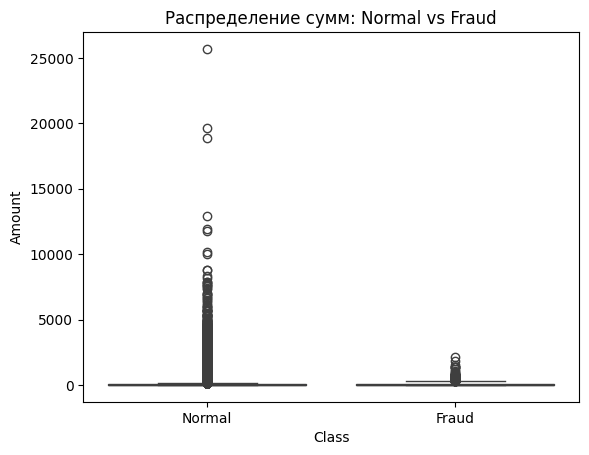

In [15]:
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Amount Distribution by Class')
plt.title('Распределение сумм: Normal vs Fraud')
plt.xticks([0, 1], ['Normal', 'Fraud'])
plt.show()

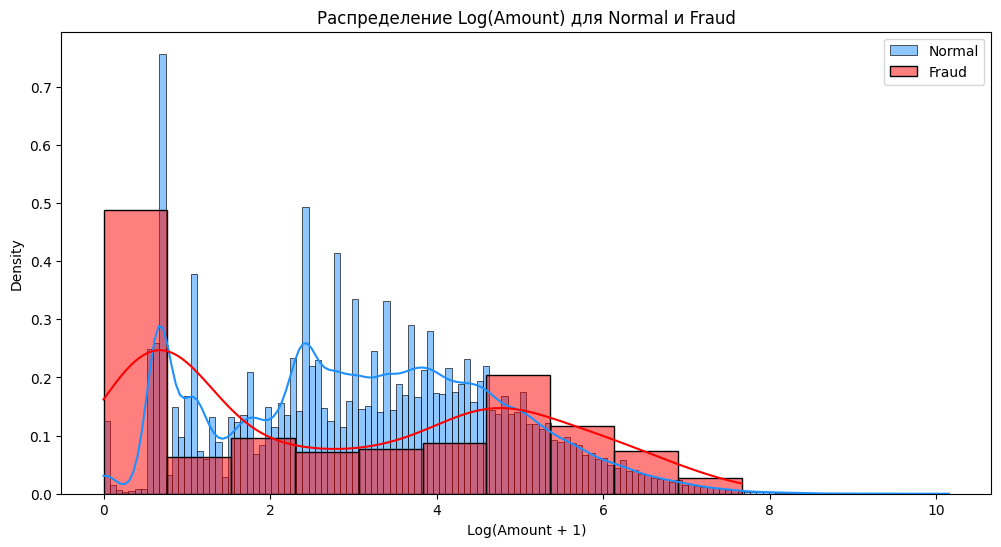

In [16]:
df['Log_Amount'] = np.log1p(df['Amount'])

plt.figure(figsize=(12, 6))
sns.histplot(df[df['Class'] == 0]['Log_Amount'], color='dodgerblue', label='Normal', kde=True, stat="density")
sns.histplot(df[df['Class'] == 1]['Log_Amount'], color='red', label='Fraud', kde=True, stat="density")

plt.title('Распределение Log(Amount) для Normal и Fraud')
plt.xlabel('Log(Amount + 1)')
plt.legend()
plt.show()

In [17]:
zero_fraud = df[(df['Class'] == 1) & (df['Amount'] == 0)].shape[0]
print(f"Количество фрод-транзакций с суммой 0: {zero_fraud}")

Количество фрод-транзакций с суммой 0: 27


##Статистика по PCA компонентам

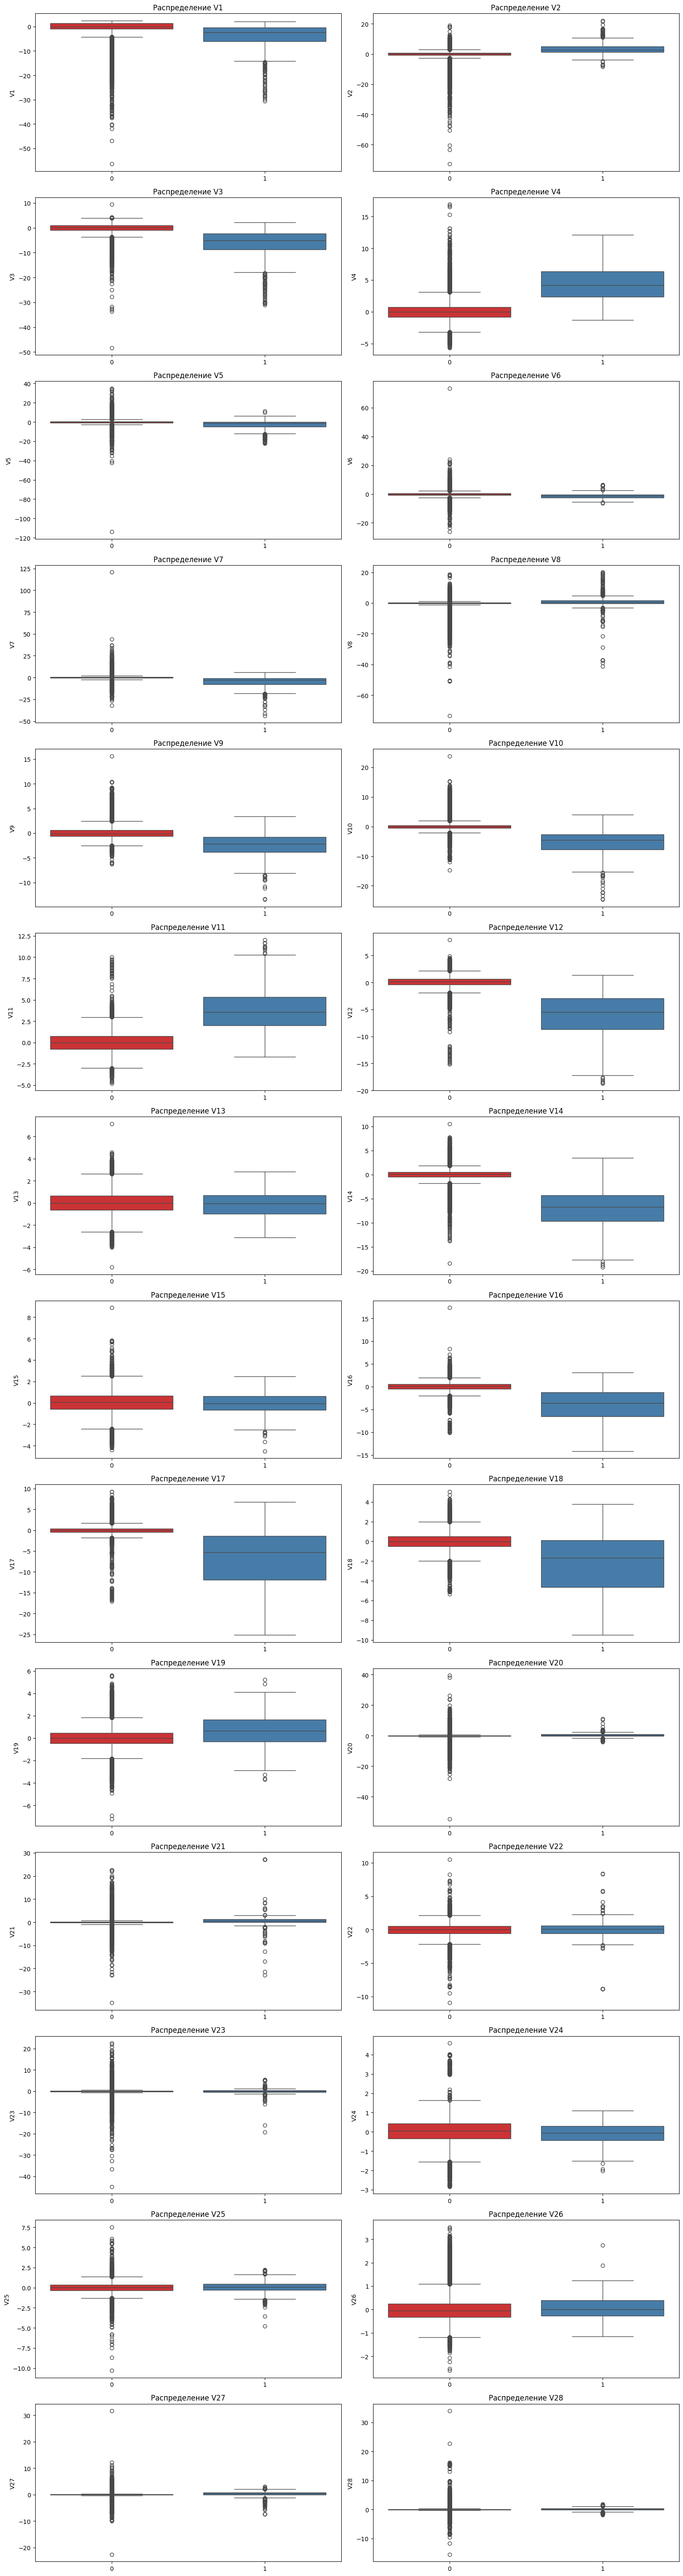

In [18]:
v_features = df.iloc[:, 1:29].columns

fig, axes = plt.subplots(nrows=14, ncols=2, figsize=(16, 60))
axes = axes.flatten()

for i, col in enumerate(v_features):
    sns.boxplot(x='Class', y=col, data=df, ax=axes[i],
                hue='Class', palette='Set1', legend=False)

    axes[i].set_title(f'Распределение {col}', fontsize=12)
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()

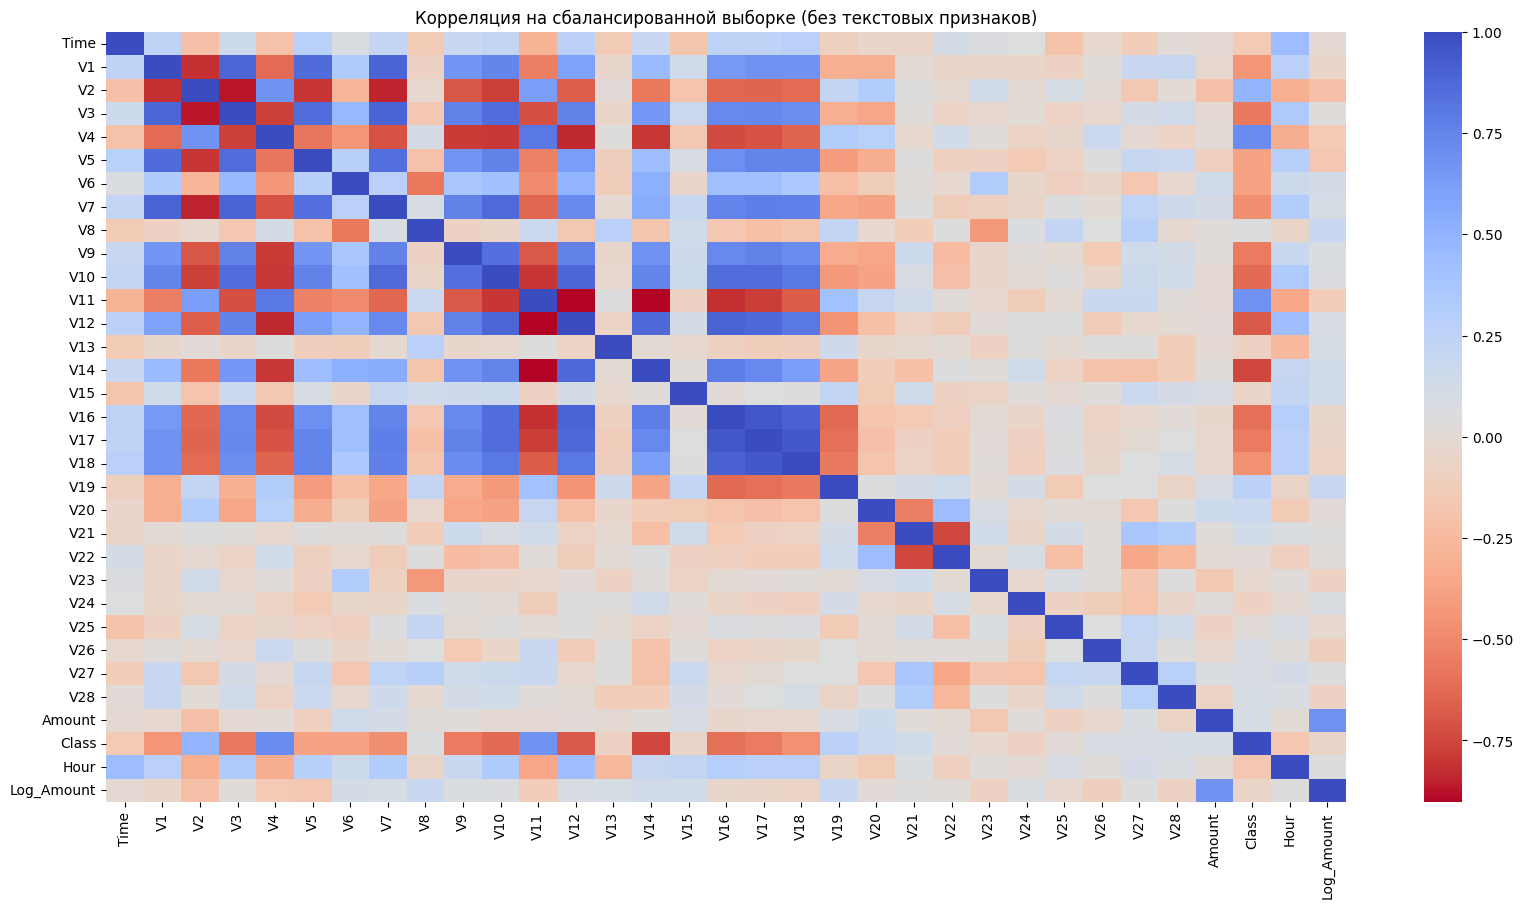

In [19]:
fraud_df = df[df['Class'] == 1]
normal_df = df[df['Class'] == 0].sample(len(fraud_df), random_state=42)
balanced_df = pd.concat([fraud_df, normal_df])

plt.figure(figsize=(20, 10))

corr_matrix = balanced_df.corr(numeric_only=True)

sns.heatmap(corr_matrix, cmap='coolwarm_r', annot=False)
plt.title('Корреляция на сбалансированной выборке (без текстовых признаков)')
plt.show()

In [20]:
top5 = (
    corr_matrix['Class']
        .drop('Class', axis = 0)
        .abs()
        .sort_values(ascending=False)
        .head(5)
)
top5

,Class
V14,0.749228
V4,0.712610
V11,0.685056
V12,0.682039
V10,0.628327


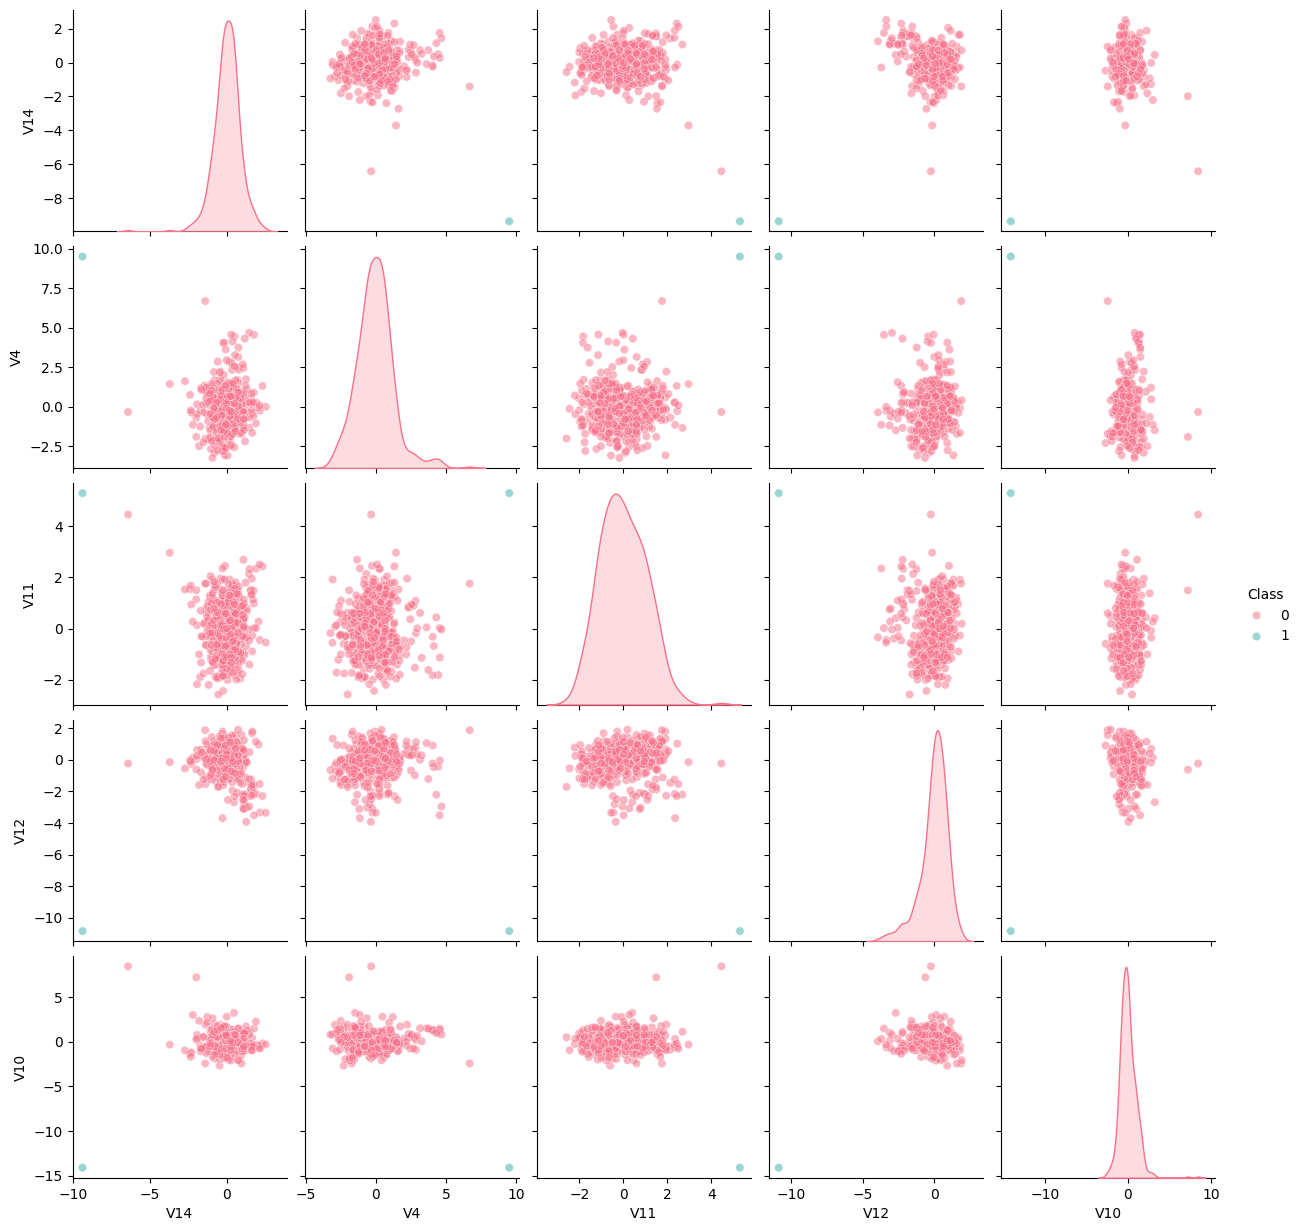

In [21]:
top_features = list(top5.index)
top_features.append('Class')

df_small = df[top_features].sample(500, random_state=42)

sns.pairplot(
    df_small,
    hue='Class',
    palette='husl',
    plot_kws={'alpha': 0.5},
    height=2.5
)


##Разделение классов

t-SNE выполнено за 7.21 сек


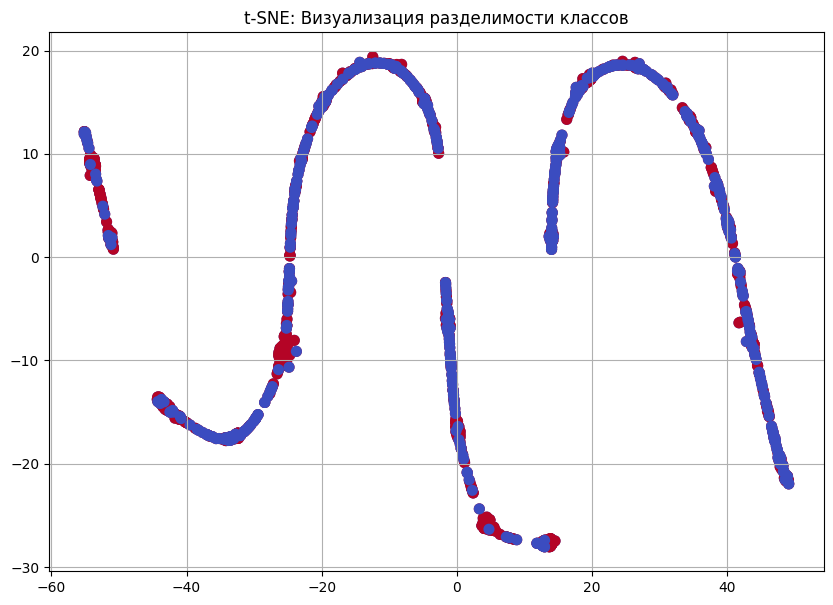

In [22]:
df_fraud = df[df['Class'] == 1]
df_normal = df[df['Class'] == 0].sample(len(df_fraud), random_state=42)
df_subsample = pd.concat([df_fraud, df_normal])

X_sub = df_subsample.drop('Class', axis=1).select_dtypes(include=['number'])
y_sub = df_subsample['Class']

t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_sub.values)
t1 = time.time()
print(f"t-SNE выполнено за {t1 - t0:.2f} сек")

plt.figure(figsize=(10, 7))
plt.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y_sub == 0), cmap='coolwarm', label='Normal', linewidths=2)
plt.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y_sub == 1), cmap='coolwarm', label='Fraud', linewidths=2)
plt.title('t-SNE: Визуализация разделимости классов')
plt.grid(True)
plt.show()

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


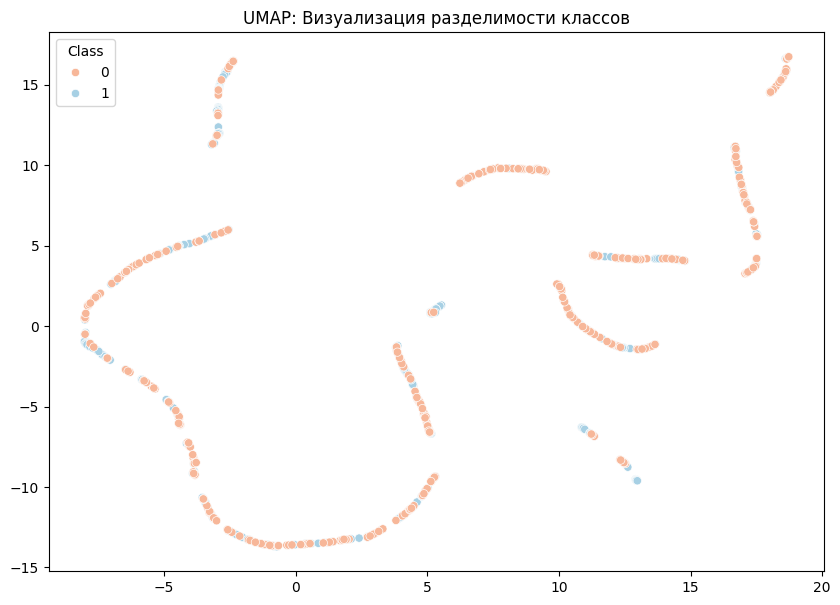

In [23]:
X_reduced_umap = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42).fit_transform(X_sub.values)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_reduced_umap[:,0], y=X_reduced_umap[:,1], hue=y_sub, palette='RdBu')
plt.title('UMAP: Визуализация разделимости классов')
plt.show()

##Feature Engineering

In [24]:
sc = StandardScaler()
df_scaled = df.copy()
df_scaled['Time'] = sc.fit_transform(df_scaled['Time'].values.reshape(-1, 1))
df_scaled['Amount'] = sc.fit_transform(df_scaled['Amount'].values.reshape(-1, 1))
df_scaled.drop(columns=['Hour', 'Time_DayPart'], axis=1, inplace=True, errors='ignore')
df_scaled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Log_Amount
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0,5.014760
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0,1.305626
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0,5.939276
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0,4.824306
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0,4.262539


In [25]:
df_scaled.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


t-SNE выполнено за 7.67 сек


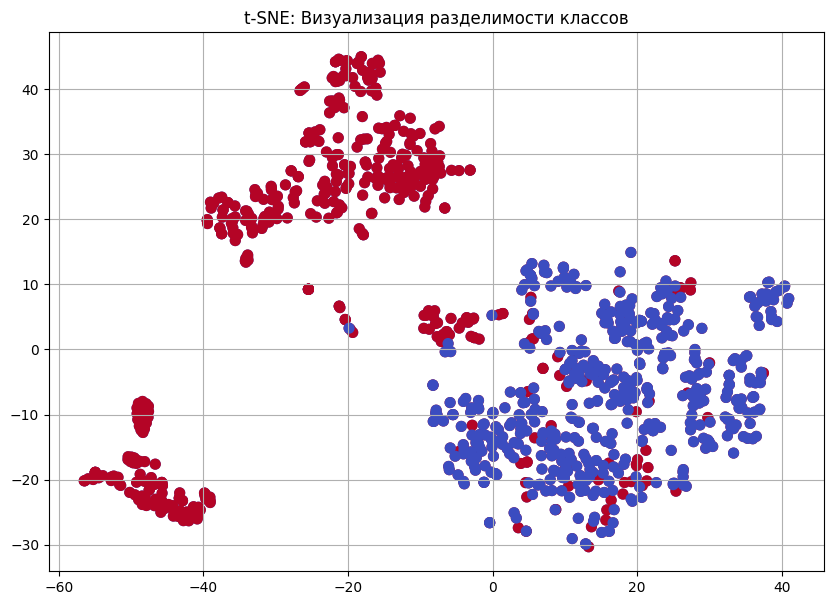

In [26]:
df_fraud = df_scaled[df_scaled['Class'] == 1]
df_normal = df_scaled[df_scaled['Class'] == 0].sample(len(df_fraud), random_state=42)
df_subsample = pd.concat([df_fraud, df_normal])

X_sub = df_subsample.drop('Class', axis=1).select_dtypes(include=['number'])
y_sub = df_subsample['Class']

t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_sub.values)
t1 = time.time()
print(f"t-SNE выполнено за {t1 - t0:.2f} сек")

plt.figure(figsize=(10, 7))
plt.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y_sub == 0), cmap='coolwarm', label='Normal', linewidths=2)
plt.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y_sub == 1), cmap='coolwarm', label='Fraud', linewidths=2)
plt.title('t-SNE: Визуализация разделимости классов')
plt.grid(True)
plt.show()

#Подготовка данных

In [27]:
X = df_scaled.drop(['Class'], axis = 1)
y = df_scaled['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)
print(f"Размер Train: {X_train.shape[0]} строк")
print(f"Размер Test:  {X_test.shape[0]} строк")
print(f"Доля фрода в Train: {y_train.mean():.4%}")
print(f"Доля фрода в Test:  {y_test.mean():.4%}")

Размер Train: 227845 строк
Размер Test:  56962 строк
Доля фрода в Train: 0.1729%
Доля фрода в Test:  0.1720%


In [28]:
X_train_orig, y_train_orig = X_train, y_train

rus = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

print(f"После Undersampling: {y_train_under.value_counts().to_dict()}")

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"После SMOTE: {y_train_smote.value_counts().to_dict()}")


После Undersampling: {0: 394, 1: 394}
После SMOTE: {0: 227451, 1: 227451}


In [29]:
results = dict()

#Base supervised model

##Logistic Regression

In [30]:
lr1 = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
lr1.fit(X_train_orig, y_train_orig)

y_pred1 = lr1.predict(X_test)
print('ROC AUC SCORE: ', roc_auc_score(y_test, y_pred1))
print('Classification report:\n', classification_report(y_test, y_pred1))
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred1))

ROC AUC SCORE:  0.9470758372285324
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962

Confusion matrix:
[[55487  1377]
 [    8    90]]


In [31]:
lr2 = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
lr2.fit(X_train_under, y_train_under)

y_pred2 = lr2.predict(X_test)
print('ROC AUC SCORE: ', roc_auc_score(y_test, y_pred2))
print('Classification report:\n', classification_report(y_test, y_pred2))
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred2))

ROC AUC SCORE:  0.9386610229347788
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.92      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.96      0.98     56962

Confusion matrix:
[[54530  2334]
 [    8    90]]


In [32]:
lr3 = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
lr3.fit(X_train_smote, y_train_smote)

y_pred3 = lr3.predict(X_test)
print('ROC AUC SCORE: ', roc_auc_score(y_test, y_pred3))
print('Classification report:\n', classification_report(y_test, y_pred3))
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred3))

ROC AUC SCORE:  0.9466801563056286
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

Confusion matrix:
[[55442  1422]
 [    8    90]]


In [33]:
preds_lr = {
    'Origin': roc_auc_score(y_test, y_pred1),
    'Under': roc_auc_score(y_test, y_pred2),
    'SMOTE': roc_auc_score(y_test, y_pred3)
}
results['Logistic Regression'] = preds_lr


##Decision Tree

In [34]:
dt1 = DecisionTreeClassifier(max_depth=3)

dt1.fit(X_train_orig, y_train_orig)

y_pred4 = dt1.predict(X_test)
print('ROC AUC SCORE: ', roc_auc_score(y_test, y_pred4))
print('Classification report:\n', classification_report(y_test, y_pred4))
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred4))

ROC AUC SCORE:  0.8824684101271347
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.78      0.77      0.77        98

    accuracy                           1.00     56962
   macro avg       0.89      0.88      0.89     56962
weighted avg       1.00      1.00      1.00     56962

Confusion matrix:
[[56843    21]
 [   23    75]]


In [35]:
dt2 = DecisionTreeClassifier(max_depth=3)

dt2.fit(X_train_under, y_train_under)

y_pred5 = dt2.predict(X_test)
print('ROC AUC SCORE: ', roc_auc_score(y_test, y_pred5))
print('Classification report:\n', classification_report(y_test, y_pred5))
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred5))

ROC AUC SCORE:  0.9186573335017743
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.88      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.92      0.52     56962
weighted avg       1.00      0.96      0.98     56962

Confusion matrix:
[[54576  2288]
 [   12    86]]


In [36]:
dt3 = DecisionTreeClassifier(max_depth=3)

dt3.fit(X_train_under, y_train_under)

y_pred6 = dt3.predict(X_test)
print('ROC AUC SCORE: ', roc_auc_score(y_test, y_pred6))
print('Classification report:\n', classification_report(y_test, y_pred6))
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred6))

ROC AUC SCORE:  0.9177692496525903
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.03      0.88      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.92      0.52     56962
weighted avg       1.00      0.96      0.98     56962

Confusion matrix:
[[54475  2389]
 [   12    86]]


In [37]:
preds_dc = {
    'Origin': roc_auc_score(y_test, y_pred4),
    'Under': roc_auc_score(y_test, y_pred5),
    'SMOTE': roc_auc_score(y_test, y_pred6)
}
results['Decision Tree'] = preds_dc


##K-nearest

In [38]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_orig, y_train_orig)

y_pred7 = knn.predict(X_test)
print('ROC AUC SCORE: ', roc_auc_score(y_test, y_pred7))
print('Classification report:\n', classification_report(y_test, y_pred7))
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred7))

ROC AUC SCORE:  0.8927955924913578
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.79      0.85        98

    accuracy                           1.00     56962
   macro avg       0.96      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Confusion matrix:
[[56857     7]
 [   21    77]]


In [39]:
knn1 = KNeighborsClassifier(n_neighbors=5)

knn1.fit(X_train_under, y_train_under)

y_pred8 = knn1.predict(X_test)
print('ROC AUC SCORE: ', roc_auc_score(y_test, y_pred8))
print('Classification report:\n', classification_report(y_test, y_pred8))
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred8))

ROC AUC SCORE:  0.9415077722141192
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.91      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.97      0.99     56962

Confusion matrix:
[[55434  1430]
 [    9    89]]


In [40]:
knn2 = KNeighborsClassifier(n_neighbors=5)

knn2.fit(X_train_smote, y_train_smote)

y_pred9 = knn2.predict(X_test)
print('ROC AUC SCORE: ', roc_auc_score(y_test, y_pred9))
print('Classification report:\n', classification_report(y_test, y_pred9))
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred9))

ROC AUC SCORE:  0.9430686033558049
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.49      0.89      0.63        98

    accuracy                           1.00     56962
   macro avg       0.74      0.94      0.81     56962
weighted avg       1.00      1.00      1.00     56962

Confusion matrix:
[[56772    92]
 [   11    87]]


In [41]:
preds_knn = {
    'Origin': roc_auc_score(y_test, y_pred7),
    'Under': roc_auc_score(y_test, y_pred8),
    'SMOTE':  roc_auc_score(y_test, y_pred9)
}
results['K Nearest'] = preds_knn

In [42]:
results

{'Logistic Regression': {'Origin': np.float64(0.9470758372285324),
  'Under': np.float64(0.9386610229347788),
  'SMOTE': np.float64(0.9466801563056286)},
 'Decision Tree': {'Origin': np.float64(0.8824684101271347),
  'Under': np.float64(0.9186573335017743),
  'SMOTE': np.float64(0.9177692496525903)},
 'K Nearest': {'Origin': np.float64(0.8927955924913578),
  'Under': np.float64(0.9415077722141192),
  'SMOTE': np.float64(0.9430686033558049)}}

#Unsupervised models(Anomaly)

##Isolation Forest

In [43]:
X_train_normal = X_train[y_train == 0]
contamination_val = y_train.sum() / len(y_train)
model_if = IsolationForest(n_estimators=100,
                           contamination=contamination_val,
                           random_state=42,
                           n_jobs=-1)
model_if.fit(X_train_normal)

IsolationForest(contamination=np.float64(0.001729245759178389), n_jobs=-1,
                random_state=42)

--- Isolation Forest Evaluation ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.19      0.23      0.21        98

    accuracy                           1.00     56962
   macro avg       0.59      0.62      0.60     56962
weighted avg       1.00      1.00      1.00     56962



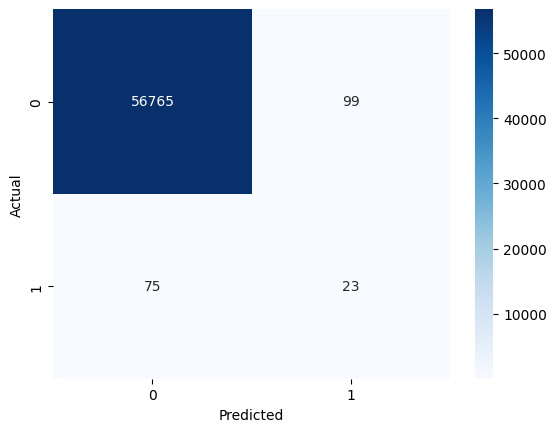

In [44]:
y_pred_raw = model_if.predict(X_test)

y_pred_if = [1 if x == -1 else 0 for x in y_pred_raw]

print("--- Isolation Forest Evaluation ---")
print(classification_report(y_test, y_pred_if))

sns.heatmap(confusion_matrix(y_test, y_pred_if), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [45]:
neighbors_settings = [10, 20, 50, 100]
for n in neighbors_settings:
    lof = LocalOutlierFactor(n_neighbors=n, contamination=0.0017, novelty=True)
    lof.fit(X_train_normal)
    y_pred_lof_raw = lof.predict(X_test)

    y_pred_lof = [1 if x == -1 else 0 for x in y_pred_lof_raw]
    print('ROC AUC SCORE: ', roc_auc_score(y_test, y_pred_lof))
    print('Classification report:\n', classification_report(y_test, y_pred_lof))
    print('Confusion matrix:')
    print(confusion_matrix(y_test, y_pred_lof))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


ROC AUC SCORE:  0.5042579215141318
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.01      0.01      0.01        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

Confusion matrix:
[[56768    96]
 [   97     1]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


ROC AUC SCORE:  0.514391659871602
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.03      0.03      0.03        98

    accuracy                           1.00     56962
   macro avg       0.51      0.51      0.51     56962
weighted avg       1.00      1.00      1.00     56962

Confusion matrix:
[[56760   104]
 [   95     3]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


ROC AUC SCORE:  0.5705141088511938
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.12      0.14      0.13        98

    accuracy                           1.00     56962
   macro avg       0.56      0.57      0.56     56962
weighted avg       1.00      1.00      1.00     56962

Confusion matrix:
[[56760   104]
 [   84    14]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


ROC AUC SCORE:  0.8919690590079588
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.43      0.79      0.56        98

    accuracy                           1.00     56962
   macro avg       0.72      0.89      0.78     56962
weighted avg       1.00      1.00      1.00     56962

Confusion matrix:
[[56763   101]
 [   21    77]]


In [46]:
input_dim = X_train.shape[1]
encoding_dim = 14

input_layer = Input(shape=(input_dim, ))

encoder = Dense(encoding_dim, activation="tanh",
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)

decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)

In [47]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

X_train_normal = X_train[y_train == 0]

history = autoencoder.fit(X_train_normal, X_train_normal,
                          epochs=50,
                          batch_size=32,
                          shuffle=True,
                          validation_split=0.2,
                          verbose=1).history

Epoch 1/50
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 1.0002 - val_loss: 0.7705
Epoch 2/50
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.7678 - val_loss: 0.7377
Epoch 3/50
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.7441 - val_loss: 0.7294
Epoch 4/50
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 0.7283 - val_loss: 0.7208
Epoch 5/50
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.7362 - val_loss: 0.7180
Epoch 6/50
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - loss: 0.7185 - val_loss: 0.7231
Epoch 7/50
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 0.7325 - val_loss: 0.7164
Epoch 8/50
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - loss: 0.7205 - val_loss: 0.7153
Epoch 9/50
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - loss: 0.7340 - val_loss: 0.7150
Epoch 10/50
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - loss: 0.7547 - val_loss: 0.7141
Epoch 11/50
5687/5687 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.7174 - val_loss: 0.7192
Epoch 12/50
5687/56

In [48]:
predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)

error_df = pd.DataFrame({'reconstruction_error': mse, 'true_class': y_test})

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


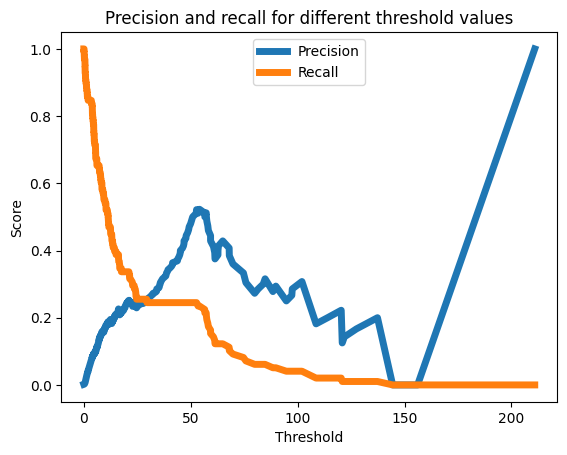

In [49]:
precision, recall, th = precision_recall_curve(error_df.true_class, error_df.reconstruction_error)

plt.plot(th, precision[1:], label="Precision", linewidth=5)
plt.plot(th, recall[1:], label="Recall", linewidth=5)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.show()

#Advanced Supervised models

##Random Forest


In [50]:
rf1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf1.fit(X_train_orig, y_train_orig)

y_pred10 = rf1.predict(X_test)
print('ROC AUC SCORE: ', roc_auc_score(y_test, y_pred10))
print('Classification report:\n', classification_report(y_test, y_pred10))
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred10))

ROC AUC SCORE:  0.9081280936685311
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.82      0.88        98

    accuracy                           1.00     56962
   macro avg       0.98      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962

Confusion matrix:
[[56860     4]
 [   18    80]]


In [51]:
rf2 = RandomForestClassifier(n_estimators=100, random_state=42)
rf2.fit(X_train_under, y_train_under)

y_pred11 = rf2.predict(X_test)
print('ROC AUC SCORE: ', roc_auc_score(y_test, y_pred11))
print('Classification report:\n', classification_report(y_test, y_pred11))
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred11))

ROC AUC SCORE:  0.9411054517473844
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.92      0.08        98

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.96      0.98     56962

Confusion matrix:
[[54808  2056]
 [    8    90]]


In [52]:
rf3 = RandomForestClassifier(n_estimators=100, random_state=42)
rf3.fit(X_train_smote, y_train_smote)

y_pred12 = rf3.predict(X_test)
print('ROC AUC SCORE: ', roc_auc_score(y_test, y_pred12))
print('Classification report:\n', classification_report(y_test, y_pred12))
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred12))

ROC AUC SCORE:  0.9182794178447969
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.89      0.84      0.86        98

    accuracy                           1.00     56962
   macro avg       0.95      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Confusion matrix:
[[56854    10]
 [   16    82]]


In [53]:
preds_rf = {
    'Origin': roc_auc_score(y_test, y_pred10),
    'Under': roc_auc_score(y_test, y_pred11),
    'SMOTE':  roc_auc_score(y_test, y_pred12)
}
results['Random Forest'] = preds_rf

##XGBOOST

In [54]:
ratio = len(y_train[y_train==0]) / len(y_train[y_train==1])
xgb1 = XGBClassifier(scale_pos_weight = ratio, random_state=42)
xgb1.fit(X_train_orig, y_train_orig)

y_pred13 = xgb1.predict(X_test)
print('ROC AUC SCORE: ', roc_auc_score(y_test, y_pred13))
print('Classification report:\n', classification_report(y_test, y_pred13))
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred13))

ROC AUC SCORE:  0.9182706249353991
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.84      0.86        98

    accuracy                           1.00     56962
   macro avg       0.94      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Confusion matrix:
[[56853    11]
 [   16    82]]


In [55]:
xgb2 = XGBClassifier(scale_pos_weight = 1, random_state=42)
xgb2.fit(X_train_under, y_train_under)

y_pred14 = xgb2.predict(X_test)
print('ROC AUC SCORE: ', roc_auc_score(y_test, y_pred14))
print('Classification report:\n', classification_report(y_test, y_pred14))
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred14))

ROC AUC SCORE:  0.936242972850367
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98     56864
           1       0.03      0.92      0.06        98

    accuracy                           0.95     56962
   macro avg       0.52      0.94      0.52     56962
weighted avg       1.00      0.95      0.97     56962

Confusion matrix:
[[54255  2609]
 [    8    90]]


In [56]:
xgb3 = XGBClassifier(scale_pos_weight = 1, random_state=42)
xgb3.fit(X_train_smote, y_train_smote)

y_pred15 = xgb3.predict(X_test)
print('ROC AUC SCORE: ', roc_auc_score(y_test, y_pred15))
print('Classification report:\n', classification_report(y_test, y_pred15))
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred15))

ROC AUC SCORE:  0.938555687469135
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.77      0.88      0.82        98

    accuracy                           1.00     56962
   macro avg       0.89      0.94      0.91     56962
weighted avg       1.00      1.00      1.00     56962

Confusion matrix:
[[56839    25]
 [   12    86]]


In [57]:
preds_xgb = {
    'Origin': roc_auc_score(y_test, y_pred13),
    'Under': roc_auc_score(y_test, y_pred14),
    'SMOTE':  roc_auc_score(y_test, y_pred15)
}

results['XGBoost'] = preds_xgb

##Neural Network

In [58]:
class FraudDetector(nn.Module):
  def __init__(self, input_dim):
    super(FraudDetector, self).__init__()
    self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(64, 32),
            nn.ReLU(),

            nn.Linear(32, 1),
            nn.Sigmoid()
        )

  def forward(self, x):
    return self.net(x)

In [59]:
input_size = X_train.shape[1]
pos_weight = torch.tensor([len(y_train[y_train==0]) / len(y_train[y_train==1])])
nn_model = FraudDetector(input_size)
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = optim.Adam(nn_model.parameters(), lr=0.001)

In [60]:
epochs = 50
batch_size = 32

X_tensor = torch.FloatTensor(X_train.values)
y_tensor = torch.FloatTensor(y_train.values).view(-1, 1)

for epoch in range(epochs):
    nn_model.train()

    outputs = nn_model(X_tensor)
    loss = criterion(outputs, y_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [10/50], Loss: 1.3502
Epoch [20/50], Loss: 1.3010
Epoch [30/50], Loss: 1.2446
Epoch [40/50], Loss: 1.1862
Epoch [50/50], Loss: 1.1338


In [61]:
nn_model.eval()
X_test_tensor = torch.FloatTensor(X_test.values)
with torch.no_grad():

    probabilities = nn_model(X_test_tensor)

    probabilities = probabilities.numpy()
    predictions = (probabilities > 0.5).astype(int)

y_pred16 = roc_auc_score(y_test, probabilities)

print(f"ROC-AUC Score: {y_pred16:.4f}")
print('Classification report:\n', classification_report(y_test, predictions))
print('Confusion matrix:')
print(confusion_matrix(y_test, predictions))

ROC-AUC Score: 0.9648
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.19      0.89      0.31        98

    accuracy                           0.99     56962
   macro avg       0.59      0.94      0.65     56962
weighted avg       1.00      0.99      1.00     56962

Confusion matrix:
[[56488   376]
 [   11    87]]


In [62]:
results['Neural Network'] = {'Origin': y_pred16}

In [63]:
results

{'Logistic Regression': {'Origin': np.float64(0.9470758372285324),
  'Under': np.float64(0.9386610229347788),
  'SMOTE': np.float64(0.9466801563056286)},
 'Decision Tree': {'Origin': np.float64(0.8824684101271347),
  'Under': np.float64(0.9186573335017743),
  'SMOTE': np.float64(0.9177692496525903)},
 'K Nearest': {'Origin': np.float64(0.8927955924913578),
  'Under': np.float64(0.9415077722141192),
  'SMOTE': np.float64(0.9430686033558049)},
 'Random Forest': {'Origin': np.float64(0.9081280936685311),
  'Under': np.float64(0.9411054517473844),
  'SMOTE': np.float64(0.9182794178447969)},
 'XGBoost': {'Origin': np.float64(0.9182706249353991),
  'Under': np.float64(0.936242972850367),
  'SMOTE': np.float64(0.938555687469135)},
 'Neural Network': {'Origin': np.float64(0.9647561349385)}}

# Сравнение моделей

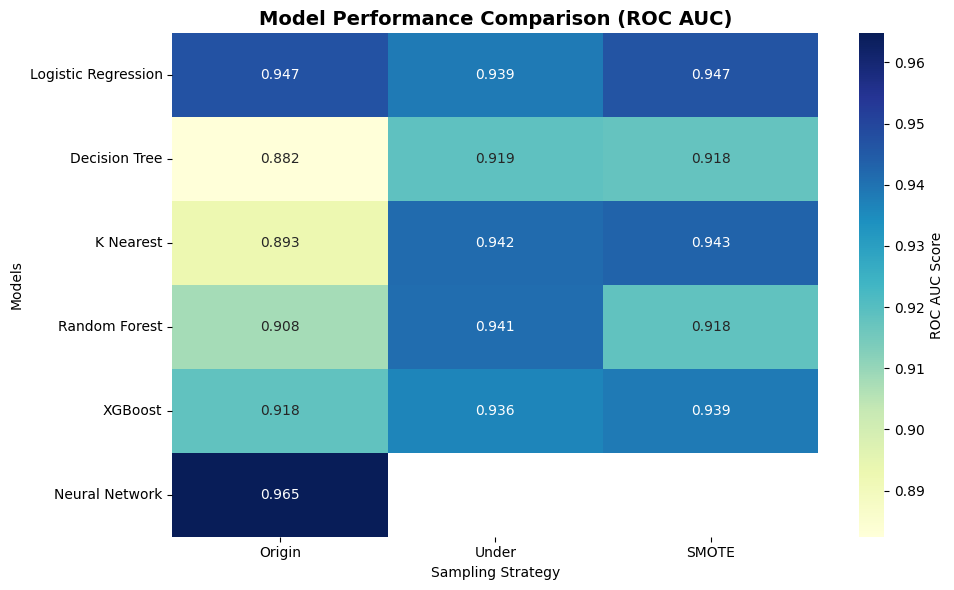

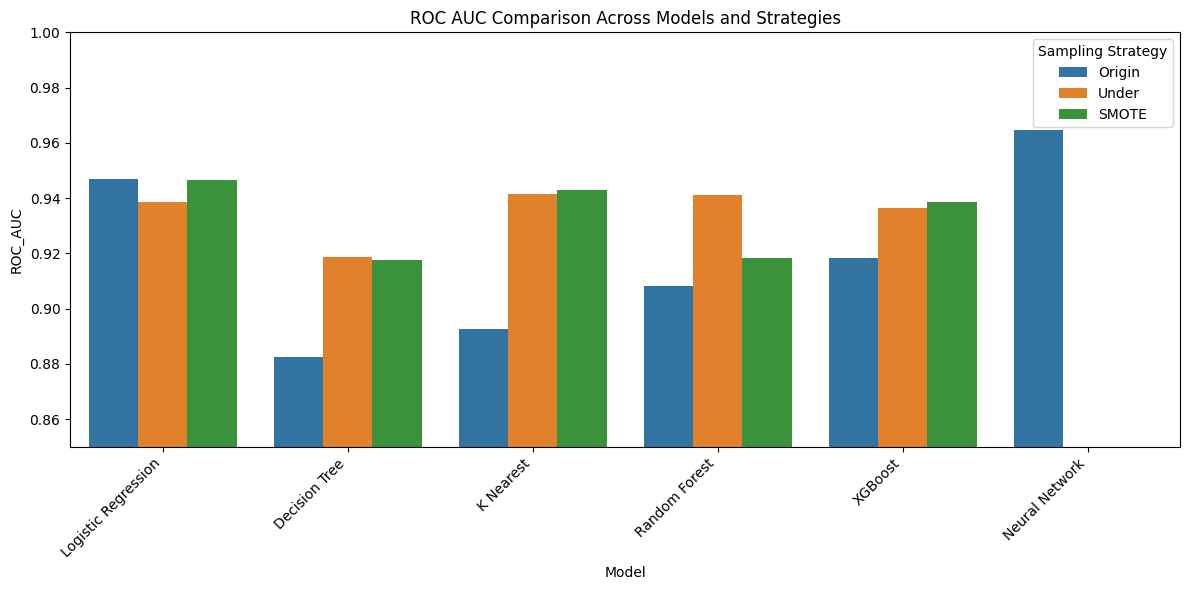

In [64]:
df_results = pd.DataFrame(results).T

plt.figure(figsize=(10, 6))
sns.heatmap(df_results, annot=True, fmt='.3f', cmap='YlGnBu',
            cbar_kws={'label': 'ROC AUC Score'})
plt.title('Model Performance Comparison (ROC AUC)', fontsize=14, weight='bold')
plt.ylabel('Models')
plt.xlabel('Sampling Strategy')
plt.tight_layout()
plt.show()

df_results_melted = df_results.reset_index().melt(id_vars='index',
                                                    var_name='Strategy',
                                                    value_name='ROC_AUC')
df_results_melted.columns = ['Model', 'Strategy', 'ROC_AUC']

plt.figure(figsize=(12, 6))
sns.barplot(data=df_results_melted, x='Model', y='ROC_AUC', hue='Strategy')
plt.xticks(rotation=45, ha='right')
plt.title('ROC AUC Comparison Across Models and Strategies')
plt.ylim(0.85, 1.0)
plt.legend(title='Sampling Strategy')
plt.tight_layout()
plt.show()

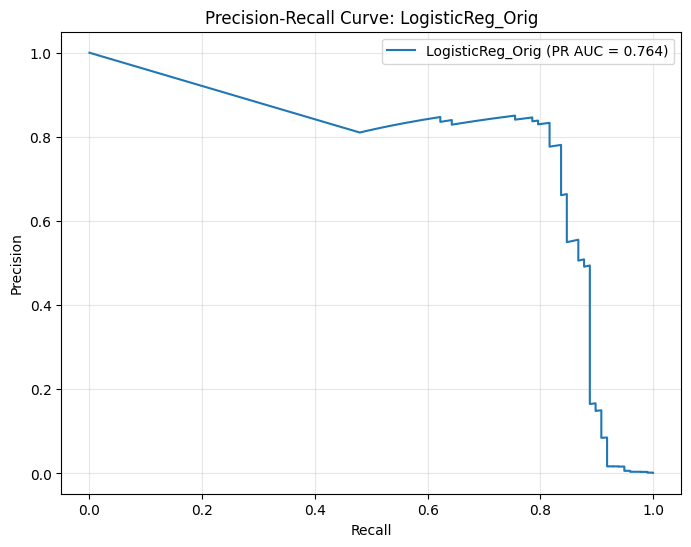

LogisticReg_Orig: PR AUC = 0.7644, Avg Precision = 0.7194


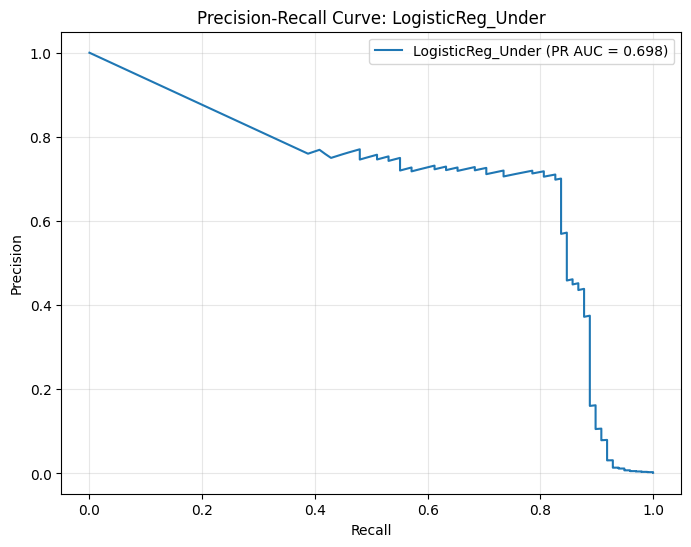

LogisticReg_Under: PR AUC = 0.6978, Avg Precision = 0.6521


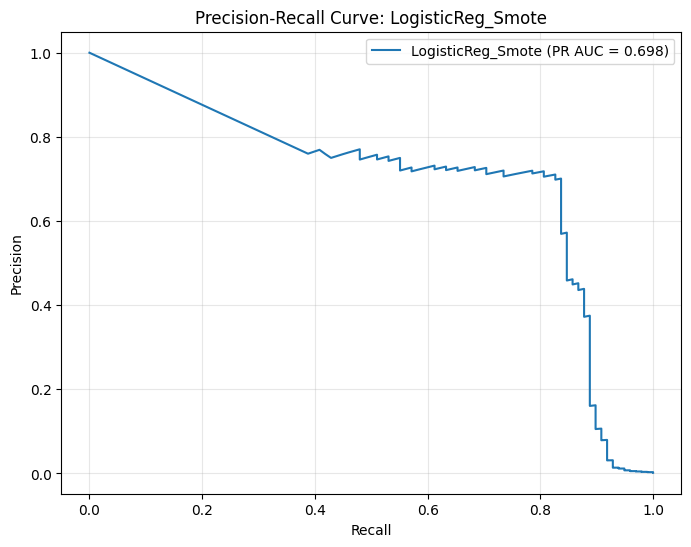

LogisticReg_Smote: PR AUC = 0.6978, Avg Precision = 0.6521


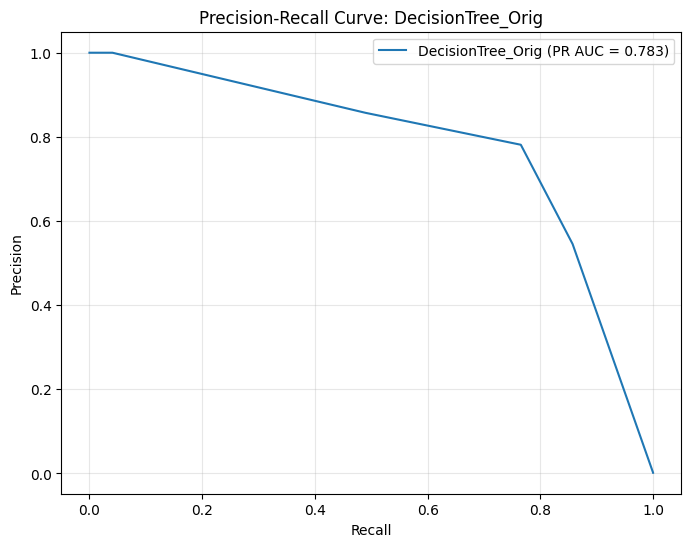

DecisionTree_Orig: PR AUC = 0.7834, Avg Precision = 0.6912


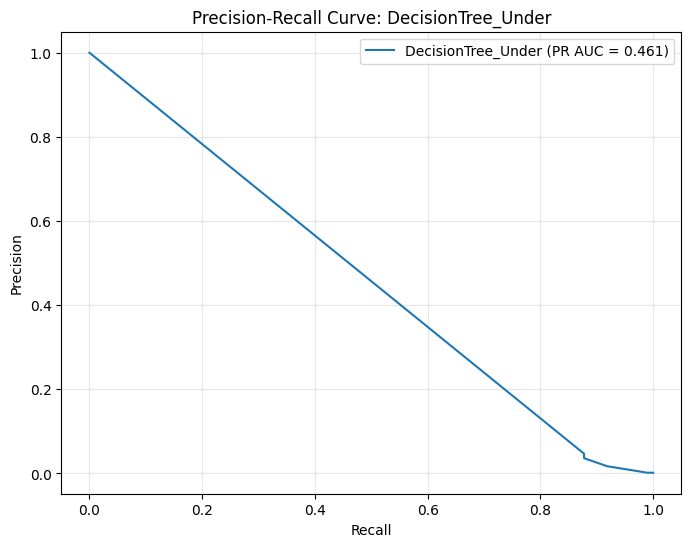

DecisionTree_Under: PR AUC = 0.4611, Avg Precision = 0.0420


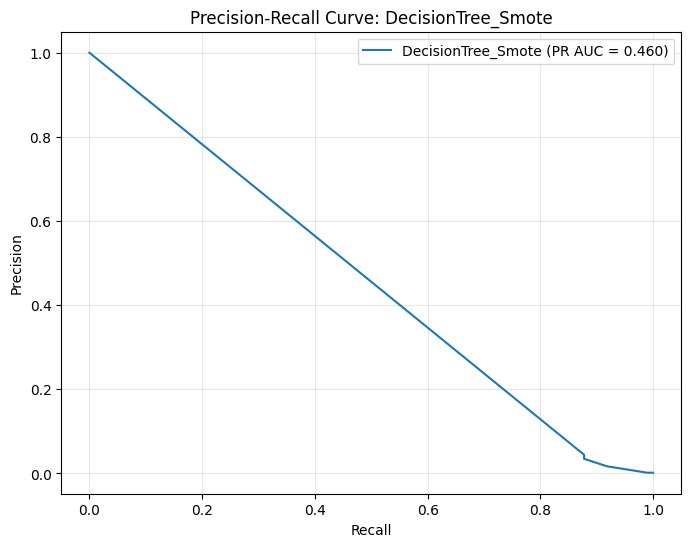

DecisionTree_Smote: PR AUC = 0.4600, Avg Precision = 0.0398


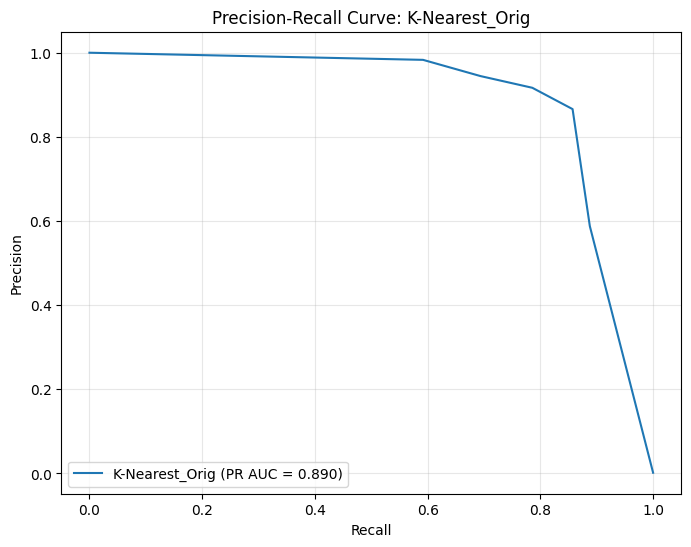

K-Nearest_Orig: PR AUC = 0.8896, Avg Precision = 0.8424


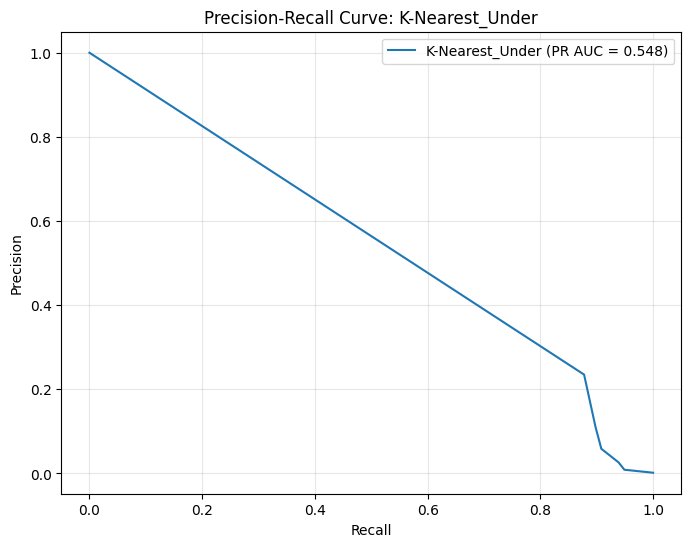

K-Nearest_Under: PR AUC = 0.5480, Avg Precision = 0.2100


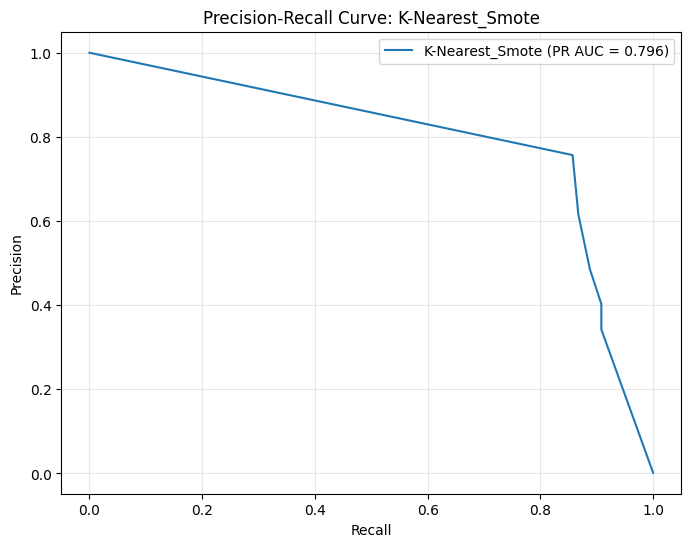

K-Nearest_Smote: PR AUC = 0.7960, Avg Precision = 0.6732


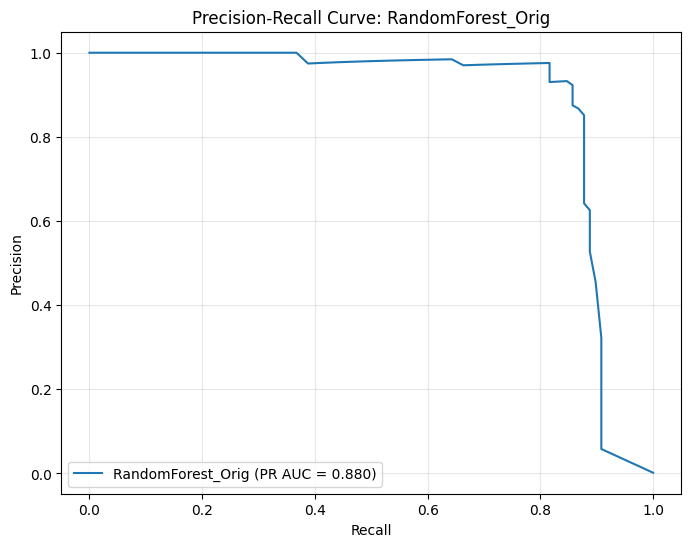

RandomForest_Orig: PR AUC = 0.8803, Avg Precision = 0.8762


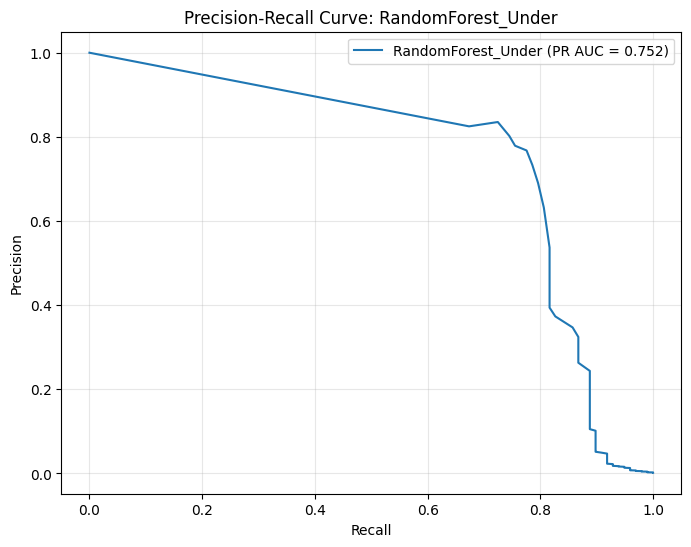

RandomForest_Under: PR AUC = 0.7516, Avg Precision = 0.6903


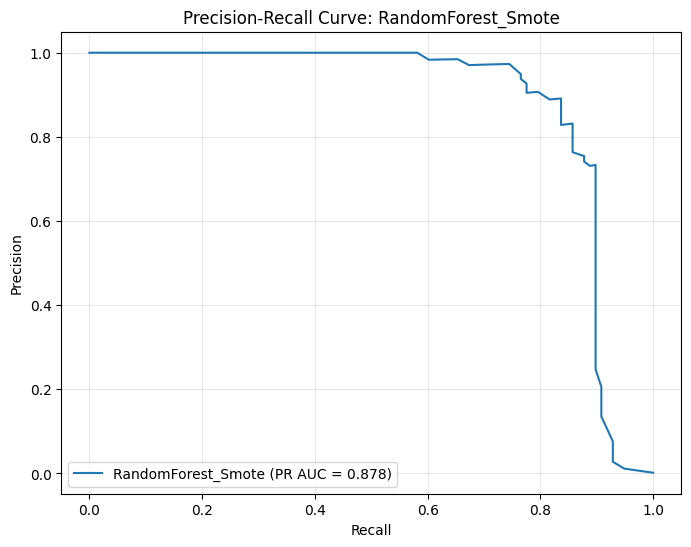

RandomForest_Smote: PR AUC = 0.8782, Avg Precision = 0.8767


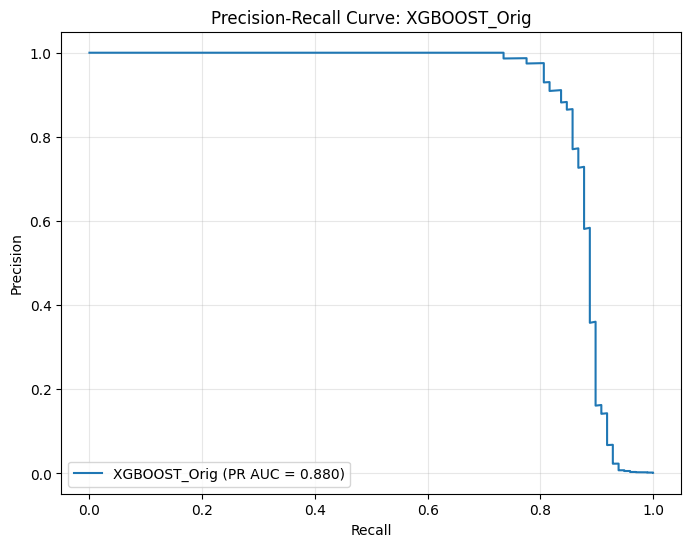

XGBOOST_Orig: PR AUC = 0.8799, Avg Precision = 0.8800


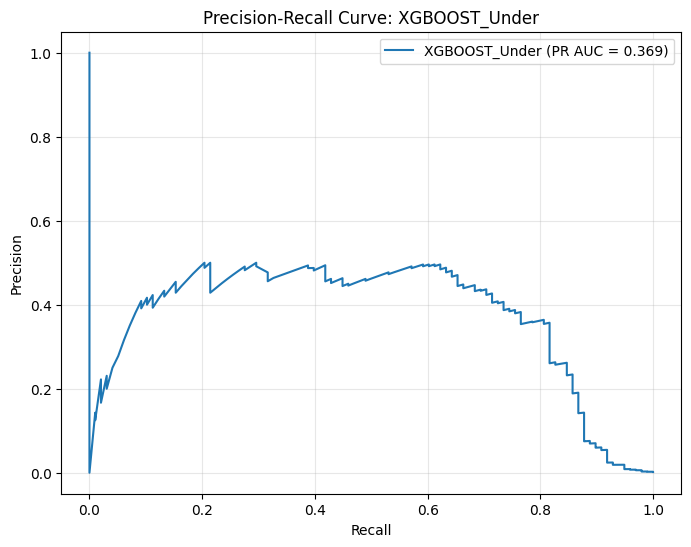

XGBOOST_Under: PR AUC = 0.3686, Avg Precision = 0.3750


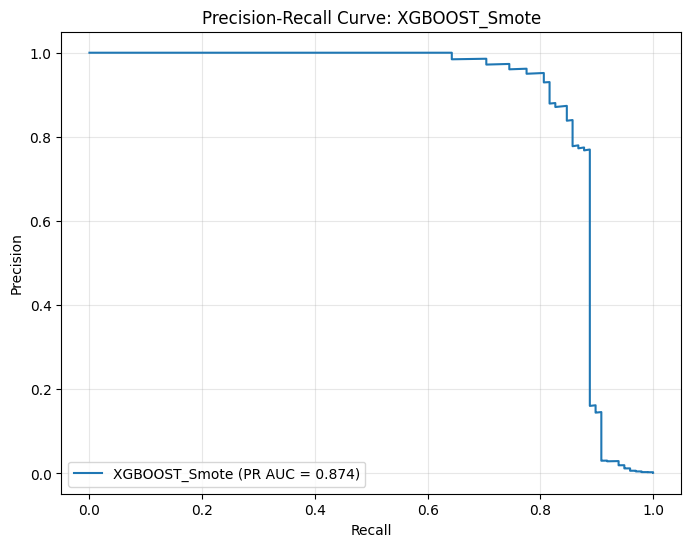

XGBOOST_Smote: PR AUC = 0.8745, Avg Precision = 0.8746


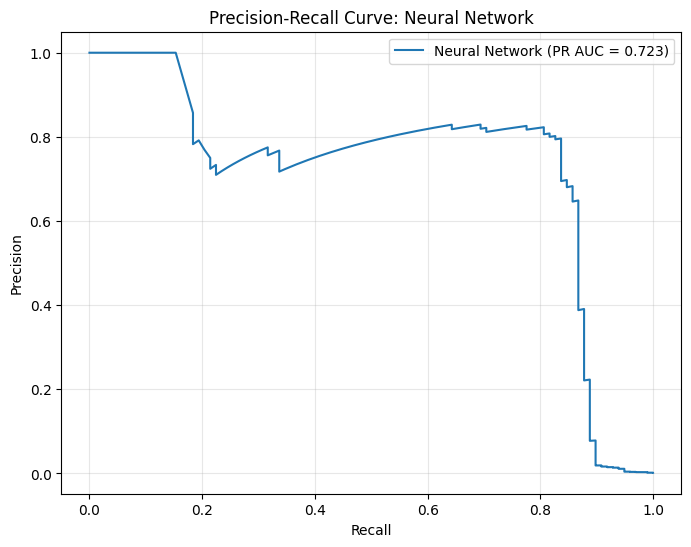

Neural Network: PR AUC = 0.7233, Avg Precision = 0.7223


In [65]:
def evaluate_pr_auc(model, X_test, y_test, model_name):
    y_proba = None
    if isinstance(model, torch.nn.Module):
        model.eval()
        with torch.no_grad():
            X_test_tensor = torch.FloatTensor(X_test.values)
            y_proba = model(X_test_tensor).numpy().flatten()
    elif hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_proba = model.decision_function(X_test)
    else:
        raise AttributeError(f"Model '{model_name}' does not have 'predict_proba', 'decision_function', or is not a PyTorch nn.Module.")

    precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
    pr_auc = auc(recall, precision)
    avg_precision = average_precision_score(y_test, y_proba)

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f'{model_name} (PR AUC = {pr_auc:.3f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve: {model_name}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    return pr_auc, avg_precision

trained_models = {'LogisticReg_Orig': lr1,'LogisticReg_Under': lr2,'LogisticReg_Smote': lr2, 'DecisionTree_Orig': dt1, 'DecisionTree_Under': dt2, 'DecisionTree_Smote': dt3,
                  'K-Nearest_Orig': knn, 'K-Nearest_Under': knn1,'K-Nearest_Smote': knn2, 'RandomForest_Orig': rf1, 'RandomForest_Under': rf2, 'RandomForest_Smote': rf3,
                  'XGBOOST_Orig': xgb1, 'XGBOOST_Under': xgb2, 'XGBOOST_Smote': xgb3, 'Neural Network': nn_model}

pr_results = {}
for model_name, model_instance in trained_models.items():
    pr_auc, avg_pr = evaluate_pr_auc(model_instance, X_test, y_test, model_name)
    pr_results[model_name] = {'PR_AUC': pr_auc, 'Avg_Precision': avg_pr}
    print(f"{model_name}: PR AUC = {pr_auc:.4f}, Avg Precision = {avg_pr:.4f}")


MODEL: Neural Network

Confusion Matrix:
[[56488   376]
 [   11    87]]


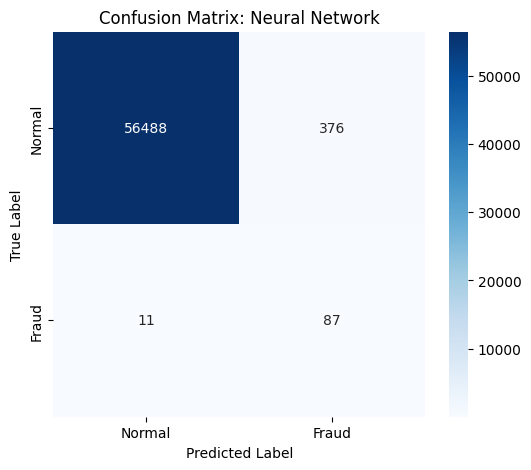

Precision..................... 0.1879
Recall........................ 0.8878
F1-Score...................... 0.3102
ROC AUC....................... 0.9648
PR AUC........................ 0.7223
MCC........................... 0.4067
True Positives................ 87
False Positives............... 376
True Negatives................ 56488
False Negative Rate........... 0.1122
False Positive Rate........... 0.0066

Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      0.99      1.00     56864
       Fraud       0.19      0.89      0.31        98

    accuracy                           0.99     56962
   macro avg       0.59      0.94      0.65     56962
weighted avg       1.00      0.99      1.00     56962


MODEL: Logistic Regression (SMOTE)

Confusion Matrix:
[[55442  1422]
 [    8    90]]


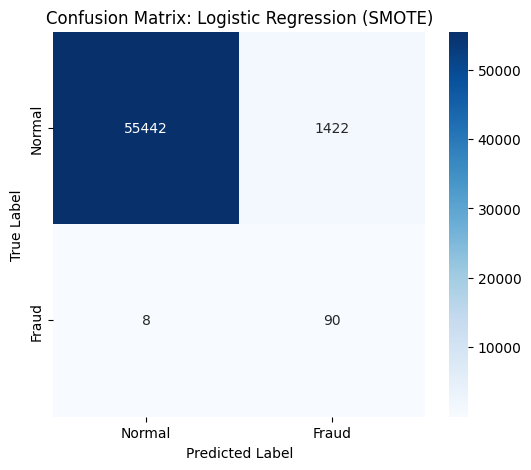

Precision..................... 0.0595
Recall........................ 0.9184
F1-Score...................... 0.1118
ROC AUC....................... 0.9700
PR AUC........................ 0.7234
MCC........................... 0.2303
True Positives................ 90
False Positives............... 1422
True Negatives................ 55442
False Negative Rate........... 0.0816
False Positive Rate........... 0.0250

Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      0.97      0.99     56864
       Fraud       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962


MODEL: K Nearest (SMOTE)

Confusion Matrix:
[[56772    92]
 [   11    87]]


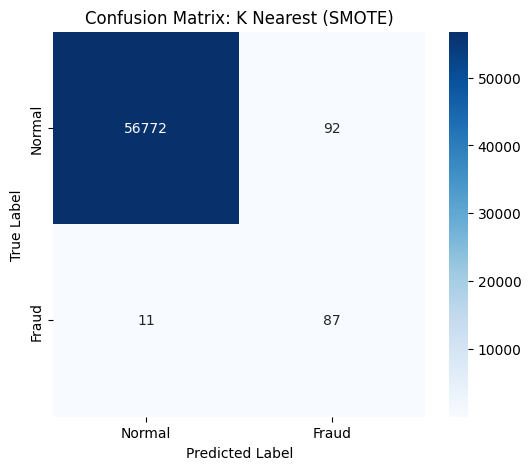

Precision..................... 0.4860
Recall........................ 0.8878
F1-Score...................... 0.6282
ROC AUC....................... 0.9537
PR AUC........................ 0.6732
MCC........................... 0.6561
True Positives................ 87
False Positives............... 92
True Negatives................ 56772
False Negative Rate........... 0.1122
False Positive Rate........... 0.0016

Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     56864
       Fraud       0.49      0.89      0.63        98

    accuracy                           1.00     56962
   macro avg       0.74      0.94      0.81     56962
weighted avg       1.00      1.00      1.00     56962



In [66]:
def comprehensive_evaluation(model, X_test, y_test, model_name, threshold=0.5):
    y_proba = None
    if isinstance(model, torch.nn.Module):
        model.eval()
        with torch.no_grad():
            X_test_tensor = torch.FloatTensor(X_test.values)
            y_proba = model(X_test_tensor).numpy().flatten()
    elif hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_proba = model.decision_function(X_test)
    else:
        raise AttributeError(f"Model '{model_name}' does not have 'predict_proba', 'decision_function', or is not a PyTorch nn.Module.")

    y_pred = (y_proba >= threshold).astype(int)

    print(f"\n{'='*60}")
    print(f"MODEL: {model_name}")
    print(f"{'='*60}")

    cm = confusion_matrix(y_test, y_pred)
    print(f"\nConfusion Matrix:")
    print(cm)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Normal', 'Fraud'],
                yticklabels=['Normal', 'Fraud'])
    plt.title(f'Confusion Matrix: {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    tn, fp, fn, tp = cm.ravel()

    metrics = {
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_proba),
        'PR AUC': average_precision_score(y_test, y_proba),
        'MCC': matthews_corrcoef(y_test, y_pred),
        'True Positives': tp,
        'False Positives': fp,
        'True Negatives': tn,
        'False Negative Rate': fn / (fn + tp)
    }
    if (fp + tn) > 0:
        metrics['False Positive Rate'] = fp / (fp + tn)
    else:
        metrics['False Positive Rate'] = float('nan') # Or handle as appropriate

    for metric, value in metrics.items():
        print(f"{metric:.<30} {value:.4f}" if isinstance(value, float) else f"{metric:.<30} {value}")

    print(f"\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Normal', 'Fraud']))

    return metrics

top_models = {
    'Neural Network': nn_model,
    'Logistic Regression (SMOTE)': lr3,
    'K Nearest (SMOTE)': knn2
}

all_metrics = {}
for name, model in top_models.items():
    all_metrics[name] = comprehensive_evaluation(model, X_test, y_test, name)

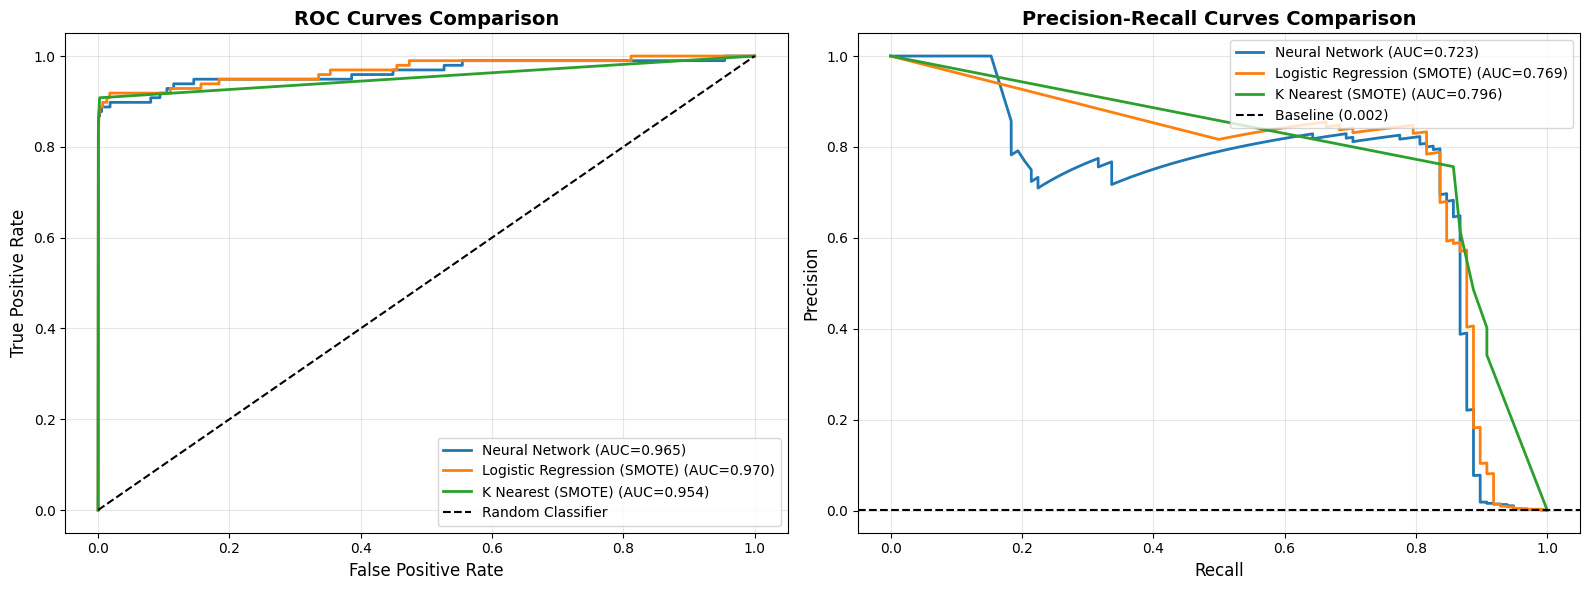

In [68]:
from sklearn.metrics import roc_curve
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

ax1 = axes[0]
for name, model in top_models.items():
    y_proba = None
    if isinstance(model, torch.nn.Module):
        model.eval()
        with torch.no_grad():
            X_test_tensor = torch.FloatTensor(X_test.values)
            y_proba = model(X_test_tensor).numpy().flatten()
    elif hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_proba = model.decision_function(X_test)
    else:
        raise AttributeError(f"Model '{name}' does not have 'predict_proba', 'decision_function', or is not a PyTorch nn.Module.")

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = roc_auc_score(y_test, y_proba)
    ax1.plot(fpr, tpr, label=f'{name} (AUC={roc_auc:.3f})', linewidth=2)

ax1.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
ax1.set_xlabel('False Positive Rate', fontsize=12)
ax1.set_ylabel('True Positive Rate', fontsize=12)
ax1.set_title('ROC Curves Comparison', fontsize=14, weight='bold')
ax1.legend(loc='lower right')
ax1.grid(True, alpha=0.3)

ax2 = axes[1]
for name, model in top_models.items():
    y_proba = None
    if isinstance(model, torch.nn.Module):
        model.eval()
        with torch.no_grad():
            X_test_tensor = torch.FloatTensor(X_test.values)
            y_proba = model(X_test_tensor).numpy().flatten()
    elif hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_proba = model.decision_function(X_test)
    else:
        raise AttributeError(f"Model '{name}' does not have 'predict_proba', 'decision_function', or is not a PyTorch nn.Module.")

    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    pr_auc = auc(recall, precision)
    ax2.plot(recall, precision, label=f'{name} (AUC={pr_auc:.3f})', linewidth=2)

baseline = y_test.sum() / len(y_test)
ax2.axhline(y=baseline, color='k', linestyle='--', label=f'Baseline ({baseline:.3f})')
ax2.set_xlabel('Recall', fontsize=12)
ax2.set_ylabel('Precision', fontsize=12)
ax2.set_title('Precision-Recall Curves Comparison', fontsize=14, weight='bold')
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#Threshold Optimization

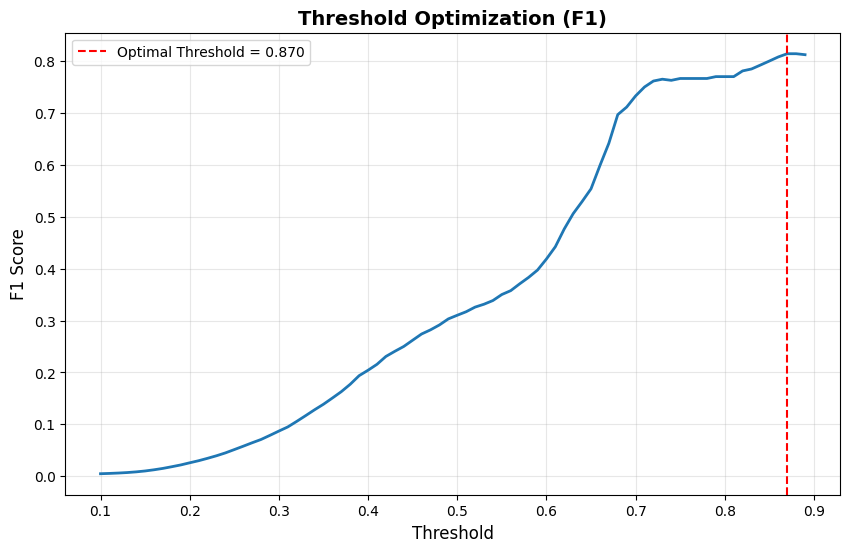

Optimal Threshold: 0.870
Optimal F1 Score: 0.8141


In [69]:
def find_optimal_threshold(model, X_test, y_test, metric='f1'):

    y_proba = None
    if isinstance(model, torch.nn.Module):
        model.eval()
        with torch.no_grad():
            X_test_tensor = torch.FloatTensor(X_test.values)
            y_proba = model(X_test_tensor).numpy().flatten()
    elif hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_proba = model.decision_function(X_test)
    else:
        raise AttributeError(f"Model does not have 'predict_proba', 'decision_function', or is not a PyTorch nn.Module.")

    thresholds = np.arange(0.1, 0.9, 0.01)
    scores = []

    for thresh in thresholds:
        y_pred = (y_proba >= thresh).astype(int)

        if metric == 'f1':
            score = f1_score(y_test, y_pred)

        elif metric == 'precision':
            score = precision_score(y_test, y_pred)
        elif metric == 'recall':
            score = recall_score(y_test, y_pred)
        else:
            raise ValueError(f"Unsupported metric: {metric}")

        scores.append(score)

    optimal_idx = np.argmax(scores)
    optimal_threshold = thresholds[optimal_idx]
    optimal_score = scores[optimal_idx]

    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, scores, linewidth=2)
    plt.axvline(optimal_threshold, color='r', linestyle='--', label=f'Optimal Threshold = {optimal_threshold:.3f}')
    plt.xlabel('Threshold', fontsize=12)
    plt.ylabel(f'{metric.upper()} Score', fontsize=12)
    plt.title(f'Threshold Optimization ({metric.upper()})', fontsize=14, weight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    print(f"Optimal Threshold: {optimal_threshold:.3f}")
    print(f"Optimal {metric.upper()} Score: {optimal_score:.4f}")

    return optimal_threshold, optimal_score

optimal_thresh_f1, _ = find_optimal_threshold(nn_model, X_test, y_test, metric='f1')

Starting XGBoost hyperparameter tuning...
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best Parameters: {'subsample': 0.6, 'scale_pos_weight': 50, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}
Best PR AUC Score: 0.8585

MODEL: XGBoost (Tuned)

Confusion Matrix:
[[56853    11]
 [   15    83]]


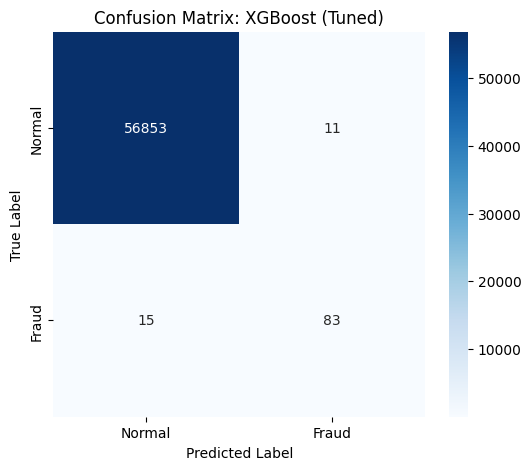

Precision..................... 0.8830
Recall........................ 0.8469
F1-Score...................... 0.8646
ROC AUC....................... 0.9806
PR AUC........................ 0.8743
MCC........................... 0.8645
True Positives................ 83
False Positives............... 11
True Negatives................ 56853
False Negative Rate........... 0.1531
False Positive Rate........... 0.0002

Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     56864
       Fraud       0.88      0.85      0.86        98

    accuracy                           1.00     56962
   macro avg       0.94      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962



{'Precision': 0.8829787234042553,
 'Recall': 0.8469387755102041,
 'F1-Score': 0.8645833333333334,
 'ROC AUC': np.float64(0.9806433969198258),
 'PR AUC': np.float64(0.8743147774921429),
 'MCC': np.float64(0.8645430972026528),
 'True Positives': np.int64(83),
 'False Positives': np.int64(11),
 'True Negatives': np.int64(56853),
 'False Negative Rate': np.float64(0.15306122448979592),
 'False Positive Rate': np.float64(0.00019344400675295442)}

In [70]:
param_grid_xgb = {
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300, 500],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'scale_pos_weight': [1, 10, 50, 100]
}

xgb_random = RandomizedSearchCV(
    estimator=xgb.XGBClassifier(random_state=42, eval_metric='aucpr'),
    param_distributions=param_grid_xgb,
    n_iter=50,
    scoring='average_precision',
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    verbose=2,
    random_state=42,
    n_jobs=-1
)

print("Starting XGBoost hyperparameter tuning...")
xgb_random.fit(X_train, y_train)

print(f"\nBest Parameters: {xgb_random.best_params_}")
print(f"Best PR AUC Score: {xgb_random.best_score_:.4f}")

best_xgb = xgb_random.best_estimator_
comprehensive_evaluation(best_xgb, X_test, y_test, "XGBoost (Tuned)")


MODEL: Stacking Ensemble

Confusion Matrix:
[[55596  1268]
 [    8    90]]


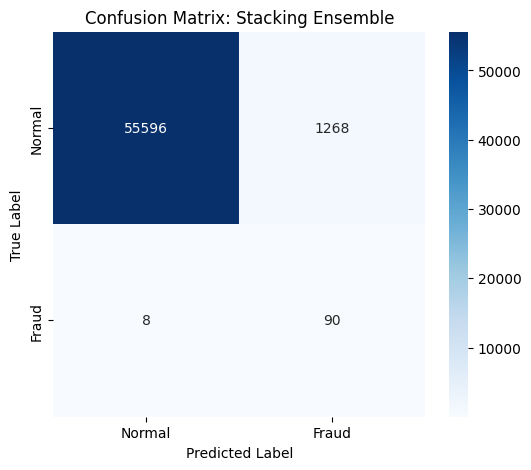

Precision..................... 0.0663
Recall........................ 0.9184
F1-Score...................... 0.1236
ROC AUC....................... 0.9720
PR AUC........................ 0.8714
MCC........................... 0.2434
True Positives................ 90
False Positives............... 1268
True Negatives................ 55596
False Negative Rate........... 0.0816
False Positive Rate........... 0.0223

Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      0.98      0.99     56864
       Fraud       0.07      0.92      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.56     56962
weighted avg       1.00      0.98      0.99     56962



{'Precision': 0.0662739322533137,
 'Recall': 0.9183673469387755,
 'F1-Score': 0.12362637362637363,
 'ROC AUC': np.float64(0.9720067859726896),
 'PR AUC': np.float64(0.8714032040098807),
 'MCC': np.float64(0.24342773777272003),
 'True Positives': np.int64(90),
 'False Positives': np.int64(1268),
 'True Negatives': np.int64(55596),
 'False Negative Rate': np.float64(0.08163265306122448),
 'False Positive Rate': np.float64(0.022298818232976927)}

In [71]:
base_models = [
    ('xgb', best_xgb),
    ('lr', lr3),
    ('knn', knn2)
]

stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(class_weight='balanced'),
    cv=5
)

stacking_clf.fit(X_train, y_train)
comprehensive_evaluation(stacking_clf, X_test, y_test, "Stacking Ensemble")

<Figure size 1000x800 with 0 Axes>

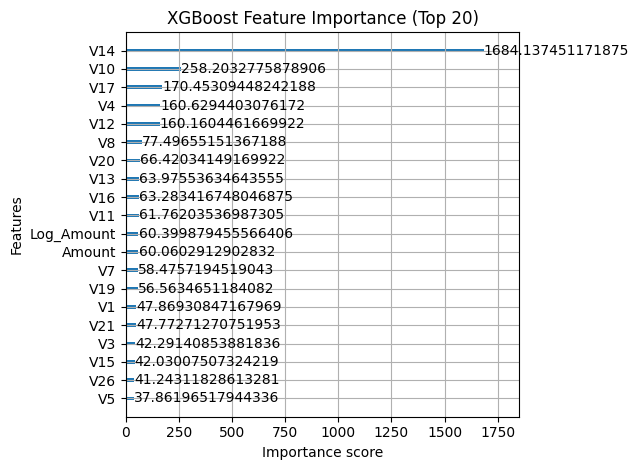

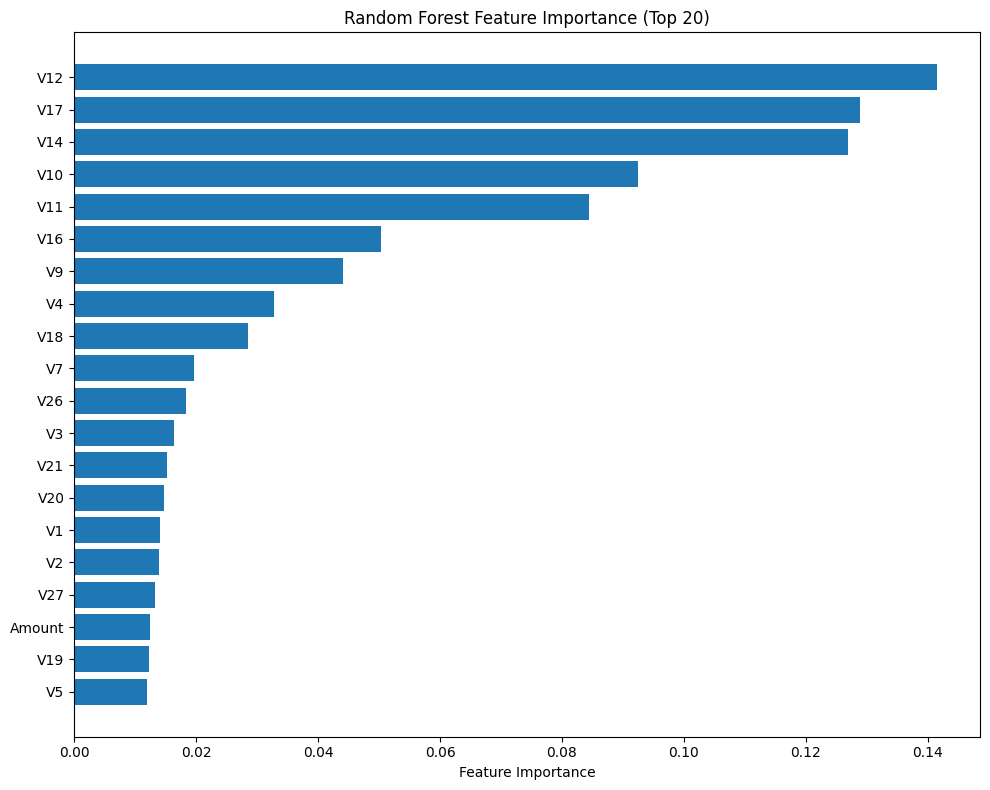

In [72]:
# Для XGBoost
plt.figure(figsize=(10, 8))
xgb.plot_importance(best_xgb, max_num_features=20, importance_type='gain')
plt.title('XGBoost Feature Importance (Top 20)')
plt.tight_layout()
plt.show()

# Для Random Forest
importances = rf1.feature_importances_
indices = np.argsort(importances)[::-1][:20]

plt.figure(figsize=(10, 8))
plt.barh(range(20), importances[indices])
plt.yticks(range(20), [f'V{i}' if i < 28 else ('Time' if i == 28 else 'Amount')
                       for i in indices])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance (Top 20)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()